#### SUPERVISED MODELS

In [3]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk import ne_chunk
from textblob import TextBlob

# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Modelling Helpers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /Users/Shwetha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Shwetha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Shwetha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/Shwetha/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
training_data = pd.read_csv('/Users/Shwetha/Desktop/Spring 2023/Machine Learning/ML Project/all_preprocessed_data.csv')

In [5]:
# combined content for stemm and lemmetazied title and lemmatized text 
training_data.loc[:,'train_stem_lem_title_text'] = training_data.loc[:,'stem_lem_title'] + training_data.loc[:,'stem_lem_text']

#### Dealing with Nulls:

Since after stemming and lemmetazing, if all words were removed, it should not be actually worth anything. Since we would be counting things and vectorizing them, putting them as empty strings is the right way to go. 

In [6]:
training_data.isnull().sum()

Unnamed: 0                    0
id                            0
title                         0
author                        0
text                          1
label                         0
utterances                    0
total_utterances              0
word_count                    0
word_count_nltk               0
title_length                  0
Length_bucket                 0
author_bool                   0
clean_text                   16
clean_title                   1
clean_authors                 0
stem_text                     0
stem_title                    0
stem_lem_text                16
stem_lem_title                3
train_stem_lem_title_text    19
dtype: int64

In [7]:
#filling nulls with empty strings
training_data.loc[:,'train_stem_lem_title_text'] = training_data.loc[:,'train_stem_lem_title_text'].fillna('')

training_data.loc[:,'stem_lem_text'] = training_data.loc[:,'stem_lem_text'].fillna('')

In [8]:
# Dividing the training set by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data.loc[:,'train_stem_lem_title_text'], training_data.label, test_size=0.20, random_state=0)

### Summary Table for Model Assessment

In [9]:
def performance_metrics(data_name, model, X_train, X_test, y_train, y_test):
    '''
    Given a machine learning model (from a python package), fit the model to the
    data and compute accuracy metrics. We also call other funtions to create summary 
    plots of the accuracy information.

    Inputs:
        data_name (str)
        model (class): pre-made machine learning model to call on the data
        X_train (pandas df): feature training data
        X_test (pandas df): feature testing data
        y_train (pandas df): label in training data
        y_test (pandas df): label in testing data

    Returns (tuple) of the following accuracy metrics: 
        training accuracy, test accuracy, precision, recall, f1
    '''
    print("Status: training {} model using {} data".format(model, data_name))

    model.fit(X_train, y_train)

    # Predictions
    y_predict = model.predict(X_test)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
   

    # Call Plot Functions
    confusion_matrix_plot(y_test, y_predict)
    all_performance_bar(accuracy_train, accuracy_test, precision, recall, f1)

    return (accuracy_train, accuracy_test, precision, recall, f1)


def confusion_matrix_plot(y_test, y_predict):
    '''
    Function to make a confusion matrix given machine learning model results

    Inputs:
        y_test (pandas df): label in testing data
        y_predict (pandas df): predicted label based on machine learning model
    '''
    confusion_matrix_out = confusion_matrix(y_test, y_predict, labels = [1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix_out, display_labels =
                                   ['1 - Unreliable News', '0 - Reliable News'])
    disp.plot()


def all_performance_bar(accuracy_train, accuracy_test, precision, recall, f1):
    '''
    Function to make a bar cart with the different accuracy metrics from the 
    machine learning model

    Inputs:
        accuracy_train (float): Trainig Accuracy of the machine learning model
        accuracy_test (float): Testing Accuracy of the machine learning model
        precision (float): Precision of the machine learning model
        recall (float): Recall of the machine learning model
        f1 (float): F1 score of the machine learning model
    '''
    x = ['Accuracy_Training', 'Accuracy_Test', 'Precision', 'Recall', 'F1_score']
    y = [accuracy_train, accuracy_test, precision, recall, f1]

    fig = plt.figure(figsize = (8, 5))    
    plt.bar(x, y, color ='maroon', width = 0.4)  
    plt.xlabel("Performance Metric")
    plt.ylabel("Score")
    plt.title("Model Performance Metrics Summary")
    plt.show()

In [10]:
##Initialize Summary Table Pandas DF  (THIS IS MEANT TO BE RUN JUST ONCE)
summary_df = pd.DataFrame(columns = [
    'Model Data', 'Model Type ', 'Accuracy_Training',
      'Accuracy_Test', 'Precision',
    'Recall', 'F1_score'])

### Predicting Unreliable News with Author Data

Motivation: In investigating the data, we discoverd that there are many prolific authors (i.e., they write many articles), and authors tend to consistently write reliable articles, or consistently write unreliable articles. Based on this finding, we wanted to investigate the power of authorship alone in predicting fake news.

Model Variants:  

&emsp;1. Simple "Lookup Table" on the author.  
&emsp;2. Logistic Regression using raw author names.  
 


**Simple author "Lookup Table" model:**   


We split the data into testing and traing datasets. Using the training data, we determine the percent of each authors articles written that are unreliable. For any author who write >= 50% unreliable articles, we predict they will always write unreliable articles. Given this prediction by author, we match each author in the testing data up to the relevant author prediction. When the author only exits in the testing data, we predict they will write unreliable artices.  

This model produces a ~92% testing accuracy, without ever implementing a machine learning algorthim.

In [84]:
# Complete the test/train split
df = training_data 
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'author'], df.loc[:,'label'])

# Bring X and y into single dataframe
frames1 = [X_train, y_train]
training = pd.concat(frames1, axis=1)
frames2 = [X_test, y_test]
testing = pd.concat(frames2, axis=1)

# Using the training data, determine the number of reliable and unreliable articles by author
training_valuecounts = training.loc[:,('author','label')].value_counts().reset_index(name='counts')
pivoted = training_valuecounts.pivot(index='author', columns='label', values='counts').reset_index()
pivoted.columns = ['author', 'label_0','label_1']
pivoted = pivoted.fillna(0)

# Using the training data, determine the predicted news classification by author
pivoted['tot'] = pivoted['label_0'] + pivoted['label_1']
pivoted['label_1'] = pivoted['label_1'] / pivoted['tot']
pivoted.loc[pivoted.loc[:,'label_1'] >= .5,'classification_predict'] = 1
pivoted.loc[pivoted.loc[:,'label_1'] < .5,'classification_predict'] = 0
lookup_table = pivoted.loc[:,['author','classification_predict']]

# Merge the predicted classification into the testing data
merged_table = pd.merge(testing, lookup_table, how = 'left', on = 'author')

# Fill in unmerged authors with label = 1 (i.e., unreliable)
print("Number of observations where the author is in the testing data, but not in the training data: ", 
    merged_table.loc[:,'classification_predict'].isna().sum(), "out of ",
    merged_table.loc[:,'classification_predict'].count())
merged_table.loc[:,'classification_predict'] = merged_table.loc[:,'classification_predict'].fillna(1)

# Calculate testing accuracy
y_predict = merged_table.loc[:,'classification_predict']
y_test = merged_table.loc[:,'label']
accuracy_test = accuracy_score(y_test, y_predict)
print("Author Lookup table model testing accuracy: ", round(accuracy_test, 3))


Number of observations where the author is in the testing data, but not in the training data:  736 out of  4306
Author Lookup table model testing accuracy:  0.919


**Logistic Regression using raw author names:**  

We produce a dummy variable for each author name, split the data into testing and training sets, and we run a logistic regression model and produce accuracy metrics.  

This model produces ~ 93% testing accuracy.

Status: training LogisticRegression() model using Raw Author Dummy Variables data


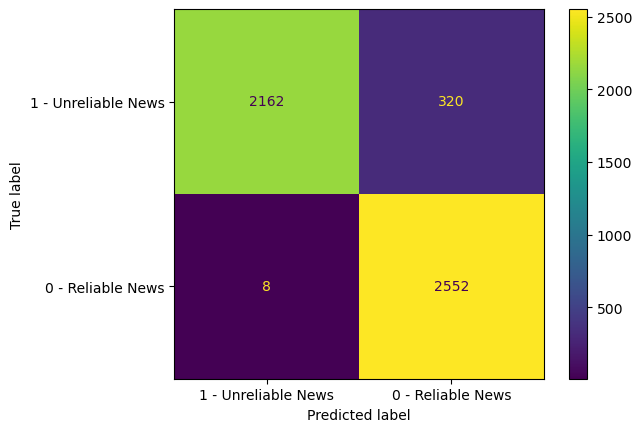

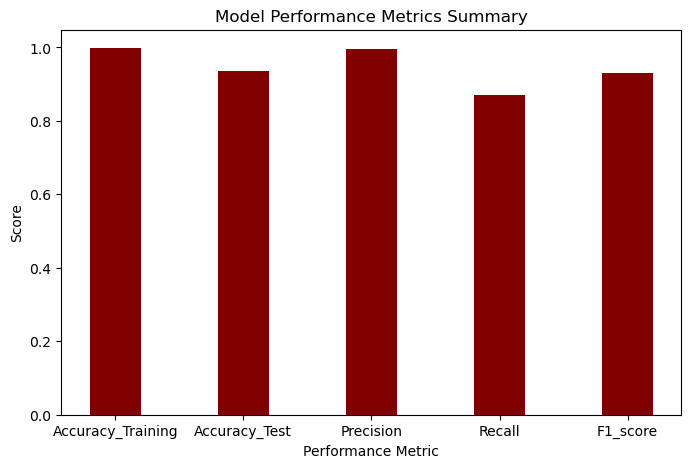

In [85]:
subset = df.loc[:,['author','label']]

# Make author name dummy variables
subset = pd.get_dummies(subset, columns = ['author'])

# Complete the test/train split
X_train, X_test, y_train, y_test = train_test_split(
    subset.iloc[:,1:], subset.loc[:,'label'])

# Run logistic regresison on data and produce performance metrics
model = LogisticRegression() 
data_name = "Raw Author Dummy Variables"

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, X_train, X_test, y_train, y_test)

# Add to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

The high accuracy of the author-only models highlight the fact that authorship is an extremenly powerful preditor of fake news. However, we are aware that this type of model only works well if the the authors in the test data exist in the training data, and thus may not be all that useful in the "real world" where training data may be more limited in authorship than the test data.

### Feature Creation

**Text-based features**

Word count: The number of words in the article text.

Sentence count: The number of sentences in the article text.

Average word length: The average length of words in the article text.

In [11]:
training_data['word_count'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: len(x.split())))
training_data['sentence_count'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: len(x.split('.'))))
training_data['average_word_length'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: np.mean([len(word) for word in x.split()])))

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [12]:
X = training_data[['word_count', 'sentence_count', 'average_word_length']]
X.isnull().sum()

X.loc[:,'average_word_length'] = X.loc[:,'average_word_length'].fillna(0)

/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1087649469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'average_word_length'] = X.loc[:,'average_word_length'].fillna(0)


**Count vectorizer:**

The Count Vectorizer generates an encoded vector that
contains the length of the entire vocabulary coupled with the frequency of each word by which it appears in the document. It converts a collection of text to a vector of term and token counts.

We experiment with both an n_gram range of unigrams and bigrams since choosing unigrams and bigrams for tasks such as text classification was recommended in the literature we read, since choosing a higher ngram size would cause the number of possible n-grams to grow exponentially, which can lead to sparsity issues and overfitting. 

In [13]:
#Count vectorizer of 1gram features only
count_vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#Count vectorizer of 1gram and 2 gram features
count_vectorizer_2gram = CountVectorizer(ngram_range=(1, 2), 
                                         stop_words='english') 
count_train_2gram = count_vectorizer_2gram.fit_transform(X_train)
count_test_2gram = count_vectorizer_2gram.transform(X_test)

**TF-IDF Vectorizer:**

TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times in a document, but also occur many times in many other docs, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TD-IDF Vectorizer will convert the documents into tokens, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents.

We choose the ngram_range for similar reasons as the count vectorizer.

In [14]:
#TF-idf vectorizer vectorizer of 1gram features only
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

#Initialize the `tfidf_vectorizer` of 1gram and 2 gram features
tfidf_vectorizer_2gram = TfidfVectorizer(stop_words='english',
                                          ngram_range=(1, 2))
tfidf_train_2gram = tfidf_vectorizer_2gram.fit_transform(X_train)
tfidf_test_2gram = tfidf_vectorizer_2gram.transform(X_test)

In [15]:
# to use to add to summary table
data_tf_idf = 'tf-idf-lemmatized'
data_count = 'count-lemmatized'
data_text = 'text-based-features'

#### Logistic regression with text-based features

Status: training LogisticRegression() model using text-based-features data


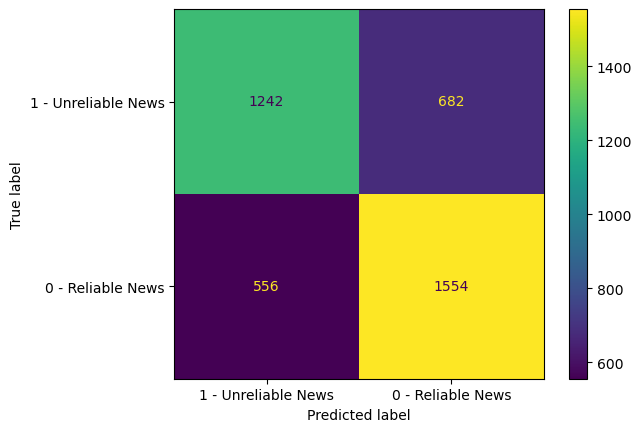

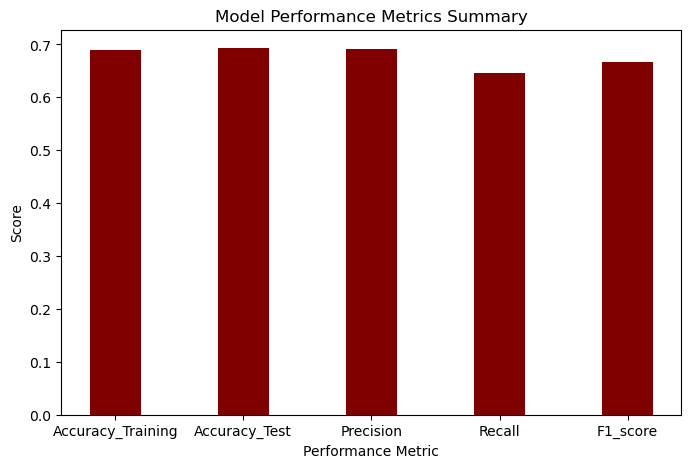

In [16]:
y = training_data['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

data_name = data_text
accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, X_train, X_test, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

### Logistic Regression with Count Vectorizer

For fake news, we need to address both scenarios and aim for a balanced approach that minimizes both false positives (classifying true news as fake) and false negatives (classifying fake news as true). If true news is misclassified as fake news, it can lead to a lack of trust in reputable news sources and the spread of misinformation. If fake news is misclassified as true news, it can lead to the spread of harmful and dangerous information that can have serious consequences for individuals and society as a whole. Hence, we need to care equally about both scenarios (false positives and false negatives).


For logisitic regression, we wanted to see what the differences would be between having 1-gram v. bigrams. Hence, we ran the models using both of them for logistic regression.

Regularization: Regularization techniques, such as L1 or L2 regularization, can also help prevent overfitting by adding a penalty term to the model's training process. This encourages the model to use only the most relevant features and reduces the chances of overfitting.


**With 1gram only**

Status: training LogisticRegression(C=100000.0) model using count-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


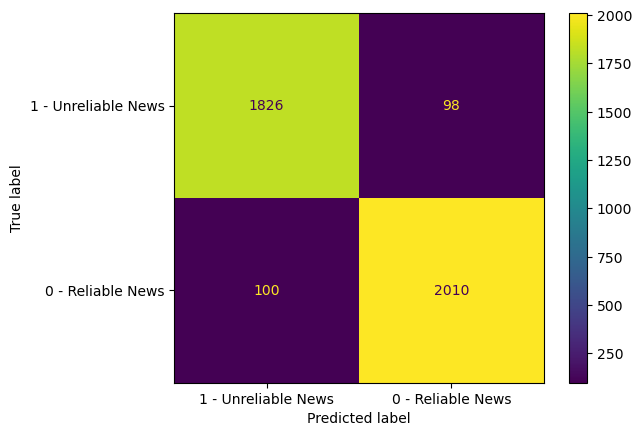

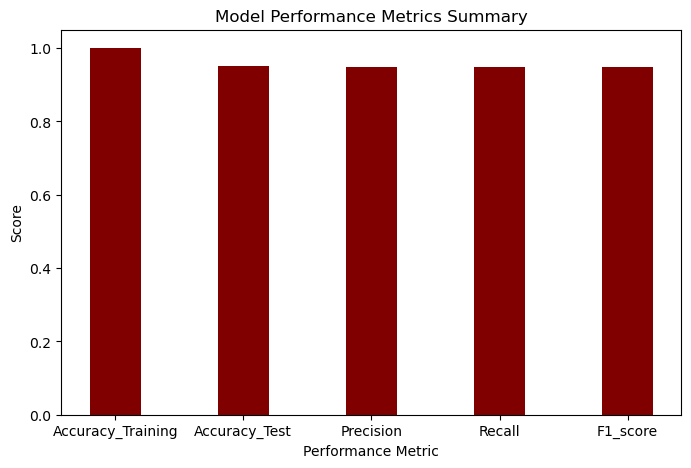

In [17]:
model = LogisticRegression(C=1e5)
data_name = data_count
accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train, count_test, y_train, y_test)

In [18]:
#get feature names for count vectorizer
feature_names = list(count_vectorizer.vocabulary_.keys())
#learned coeffs
coefficients = model.coef_[0]

#sort
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

#get the top 100
top_features = sorted_feature_names[:100]
top_weights = sorted_coefficients[:100]

for feature, weight in zip(top_features, top_weights):
    print("Feature: {}, Weight: {:.4f}".format(feature, weight))

Feature: megan, Weight: -8.6538
Feature: murray, Weight: 8.0666
Feature: infantsbut, Weight: 8.0647
Feature: ivi, Weight: -7.9993
Feature: tomjon, Weight: -7.9462
Feature: notimpress, Weight: 7.6405
Feature: tentpol, Weight: -7.0644
Feature: billioneuropean, Weight: 6.2606
Feature: moshairefa, Weight: 6.1152
Feature: believeincod, Weight: -5.6885
Feature: kommonsentsjanlord, Weight: -5.4625
Feature: zhe, Weight: -5.3875
Feature: brynjolfsson, Weight: 5.2223
Feature: renegadeninety, Weight: -5.0229
Feature: skoro, Weight: 4.6445
Feature: maiz, Weight: 4.4582
Feature: lesser, Weight: 4.4207
Feature: yackl, Weight: 4.3035
Feature: pustul, Weight: 4.3000
Feature: enlarg, Weight: 4.2320
Feature: sprint, Weight: -4.1303
Feature: assangemail, Weight: 4.0190
Feature: schoolcraft, Weight: -4.0053
Feature: amarnath, Weight: 3.9658
Feature: glissmann, Weight: -3.8871
Feature: silsbi, Weight: 3.7666
Feature: demolit, Weight: 3.7084
Feature: anti, Weight: 3.6823
Feature: condi, Weight: 3.6822
Featu

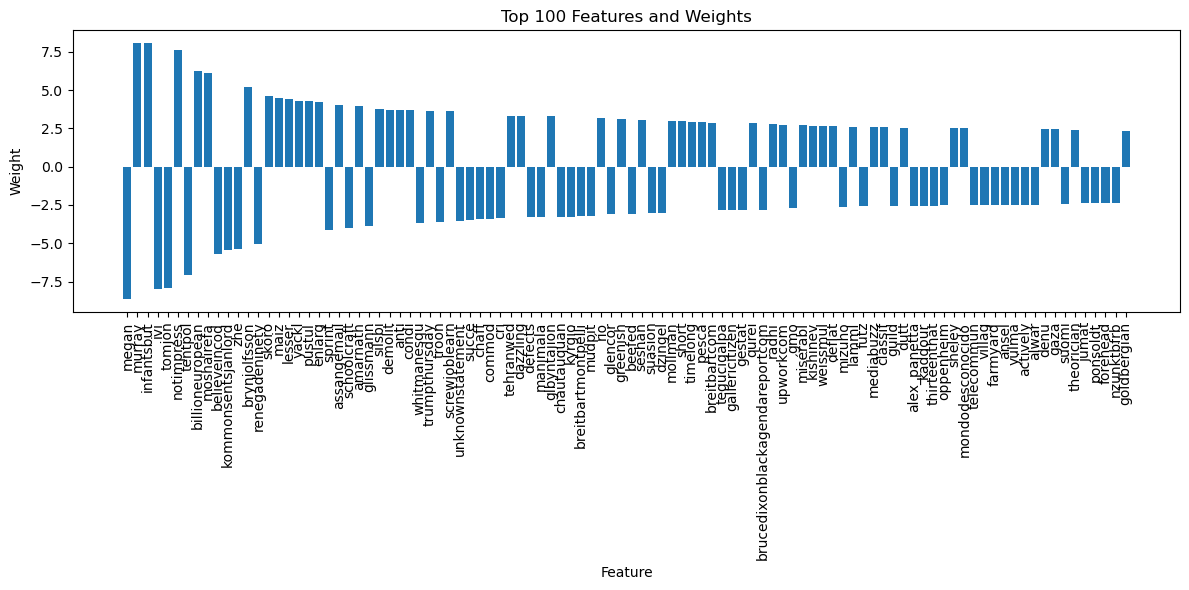

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_weights)), top_weights, align='center')
plt.xticks(range(len(top_weights)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 100 Features and Weights')
plt.tight_layout()
plt.show()

##### Features that predict unreliable news (y=1)

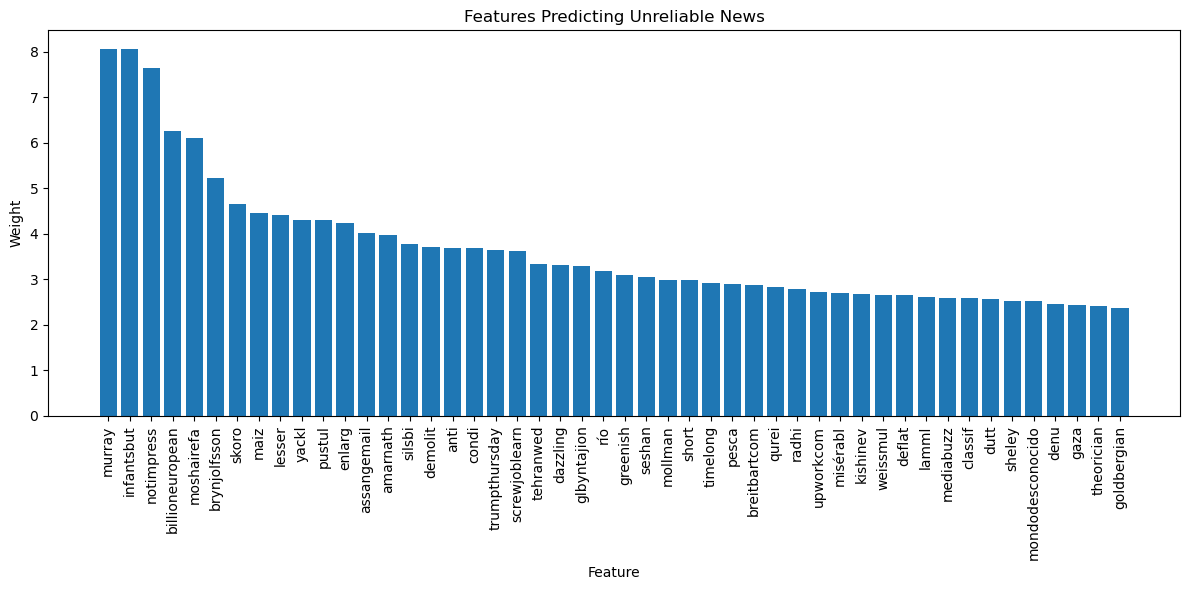

In [20]:
# Filter features that predict unreliable news (y = 1)
unreliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight > 0]

# Filter corresponding weights for unreliable features
unreliable_weights = [weight for weight in top_weights if weight > 0]

# Plot the feature weights for predicting unreliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(unreliable_weights)), unreliable_weights, align='center')
plt.xticks(range(len(unreliable_weights)), unreliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Unreliable News')
plt.tight_layout()
plt.show()

##### Features that predict reliable news (y=0)

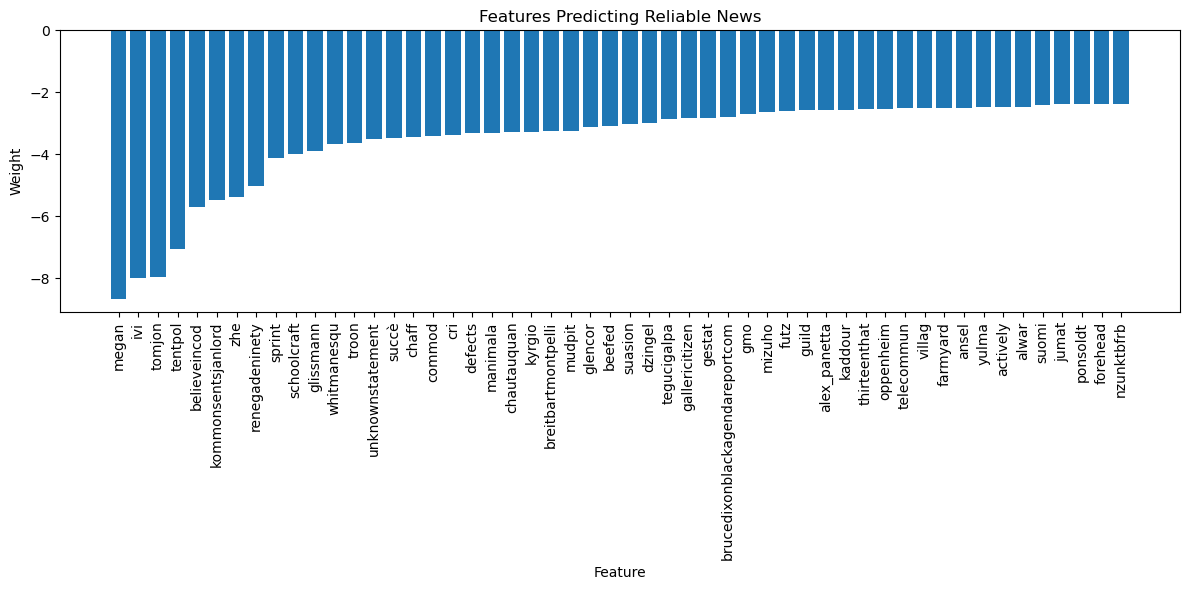

In [21]:
# Filter features that predict reliable news (y = 0)
reliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight < 0]

# Filter corresponding weights for reliable features
reliable_weights = [weight for weight in top_weights if weight < 0]

# Plot the feature weights for predicting reliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(reliable_weights)), reliable_weights, align='center')
plt.xticks(range(len(reliable_weights)), reliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Reliable News')
plt.tight_layout()
plt.show()


**With 1gram and 2 gram**

Status: training LogisticRegression(C=100000.0) model using count-lemmatized data


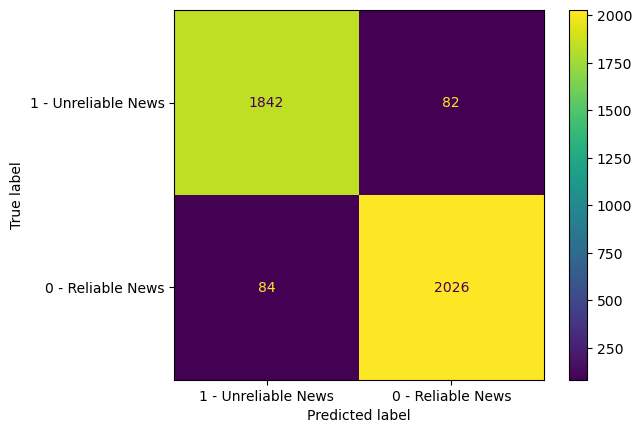

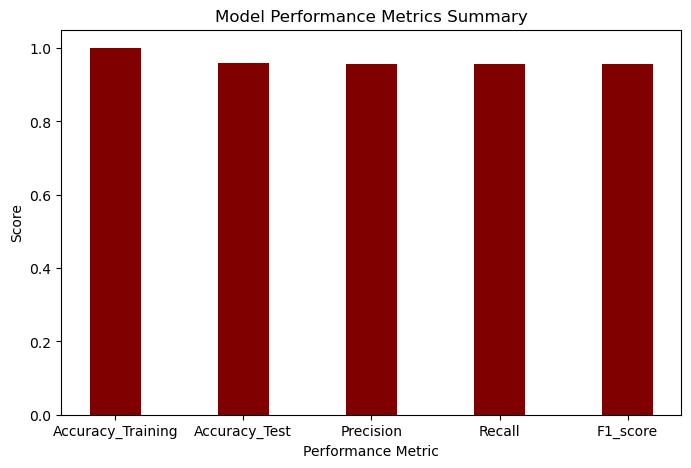

In [22]:
model = LogisticRegression(C=1e5)
data_name = data_count
accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Checking Feature Importance- Top 100 features

In [23]:
#get feature names for count vectorizer
feature_names = list(count_vectorizer_2gram.vocabulary_.keys())
#learned coeffs
coefficients = model.coef_[0]

#sort
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

#get the top 100
top_features = sorted_feature_names[:100]
top_weights = sorted_coefficients[:100]

for feature, weight in zip(top_features, top_weights):
    print("Feature: {}, Weight: {:.4f}".format(feature, weight))

Feature: irregular nune, Weight: -5.7266
Feature: gener thirty, Weight: -5.0560
Feature: point lot, Weight: -4.4947
Feature: snowden launch, Weight: -4.0350
Feature: obamacar quit, Weight: 3.4195
Feature: queer fuck, Weight: 3.2780
Feature: western teach, Weight: -3.2574
Feature: art manhattan, Weight: -3.1515
Feature: plant locat, Weight: 3.0085
Feature: agenda breitbartpresid, Weight: -2.9915
Feature: abdolrasoul, Weight: -2.8576
Feature: huge trump, Weight: 2.8374
Feature: car flash, Weight: -2.8224
Feature: rico mani, Weight: -2.7905
Feature: spokesman diseas, Weight: -2.7383
Feature: sarajo, Weight: 2.4357
Feature: mr mont, Weight: 2.3876
Feature: undress flanneri, Weight: 2.3632
Feature: tack rightward, Weight: 2.3413
Feature: administr faster, Weight: 2.3398
Feature: crotch section, Weight: 2.3144
Feature: use compromis, Weight: -2.2824
Feature: jupit king, Weight: 2.2807
Feature: gordon park, Weight: -2.2318
Feature: parti jerri, Weight: 2.1975
Feature: katehon, Weight: 2.1920


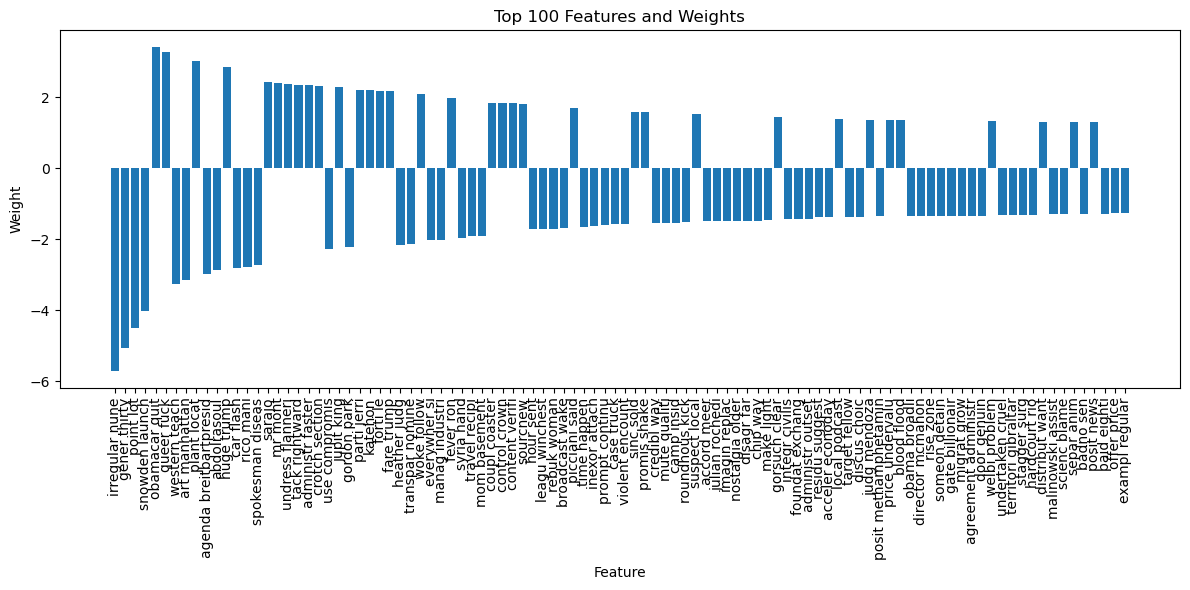

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_weights)), top_weights, align='center')
plt.xticks(range(len(top_weights)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 100 Features and Weights')
plt.tight_layout()
plt.show()

##### Features that predict unreliable news (y=1)

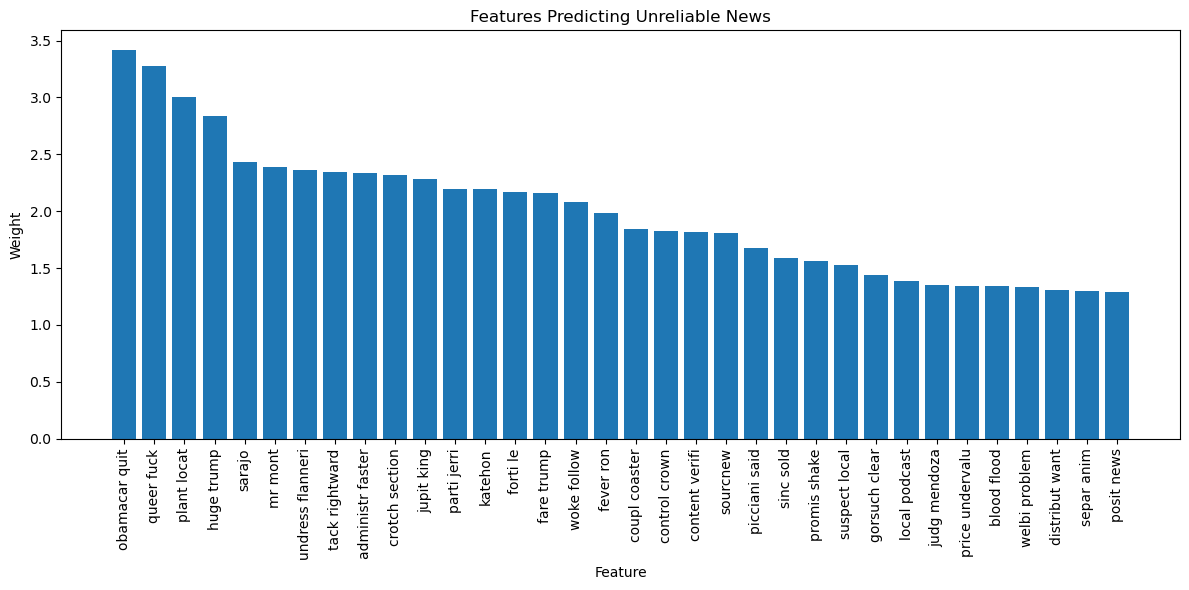

In [25]:
# Filter features that predict unreliable news (y = 1)
unreliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight > 0]

# Filter corresponding weights for unreliable features
unreliable_weights = [weight for weight in top_weights if weight > 0]

# Plot the feature weights for predicting unreliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(unreliable_weights)), unreliable_weights, align='center')
plt.xticks(range(len(unreliable_weights)), unreliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Unreliable News')
plt.tight_layout()
plt.show()

##### Features that predict reliable news (y=0)

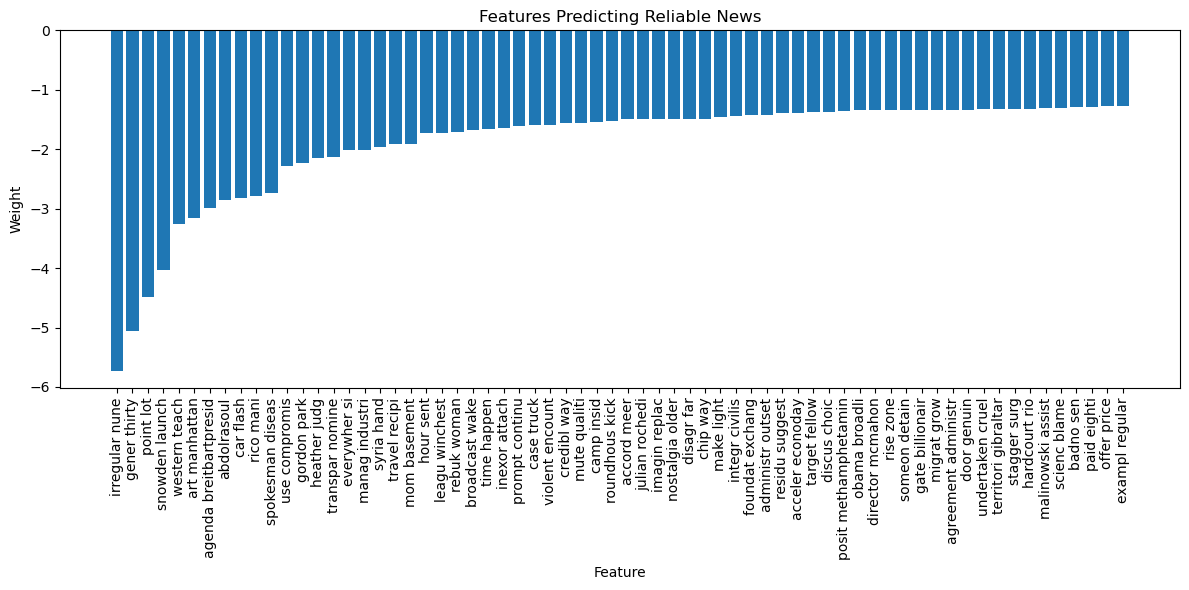

In [26]:
# Filter features that predict reliable news (y = 0)
reliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight < 0]

# Filter corresponding weights for reliable features
reliable_weights = [weight for weight in top_weights if weight < 0]

# Plot the feature weights for predicting reliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(reliable_weights)), reliable_weights, align='center')
plt.xticks(range(len(reliable_weights)), reliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Reliable News')
plt.tight_layout()
plt.show()

### Logistic Regression with TFIDF vectorizer

**With 1gram only**

Status: training LogisticRegression(C=100000.0) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


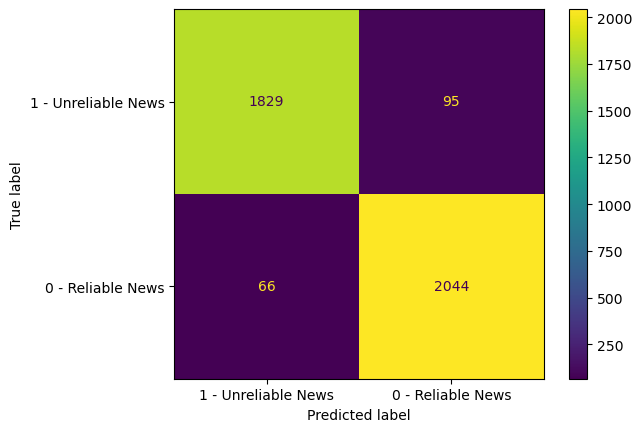

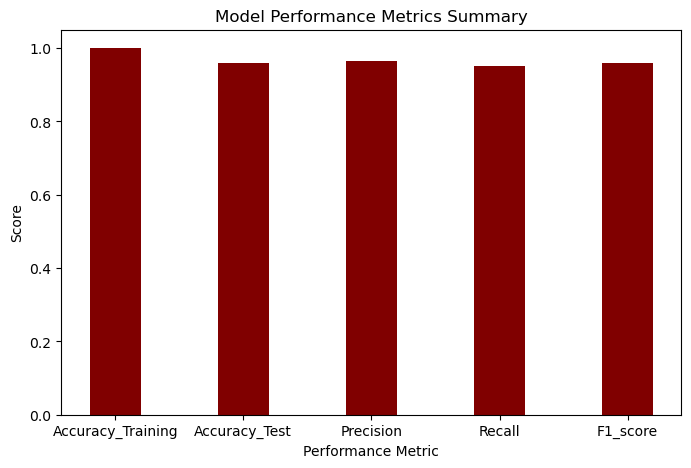

In [27]:
model = LogisticRegression(C=1e5)
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train, tfidf_test, y_train, y_test)

In [28]:
#get feature names for tdidf vectorizer
feature_names = list(tfidf_vectorizer.vocabulary_.keys())
#learned coeffs
coefficients = model.coef_[0]

#sort
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

#get the top 100
top_features = sorted_feature_names[:100]
top_weights = sorted_coefficients[:100]

for feature, weight in zip(top_features, top_weights):
    print("Feature: {}, Weight: {:.4f}".format(feature, weight))

Feature: tomjon, Weight: -71.4601
Feature: megan, Weight: -64.3431
Feature: standleav, Weight: -63.2310
Feature: kommonsentsjanlord, Weight: -61.1509
Feature: infantsbut, Weight: 58.0706
Feature: defects, Weight: -57.9880
Feature: notimpress, Weight: 55.6498
Feature: tentpol, Weight: -53.0889
Feature: murray, Weight: 52.4383
Feature: screwjoblearn, Weight: 49.2844
Feature: billioneuropean, Weight: 48.6495
Feature: moshairefa, Weight: 41.8899
Feature: troon, Weight: -39.7054
Feature: pustul, Weight: 37.7740
Feature: lesser, Weight: 36.6932
Feature: demolit, Weight: 35.5907
Feature: río, Weight: 35.2232
Feature: brynjolfsson, Weight: 34.5165
Feature: renegadeninety, Weight: -34.1275
Feature: yackl, Weight: 33.6612
Feature: skoro, Weight: 33.1020
Feature: pesca, Weight: 31.3217
Feature: believeincod, Weight: -30.9518
Feature: enlarg, Weight: 30.7657
Feature: رجال, Weight: -30.1688
Feature: zhe, Weight: -29.4146
Feature: maiz, Weight: 28.4186
Feature: canfield, Weight: 28.1165
Feature: sun

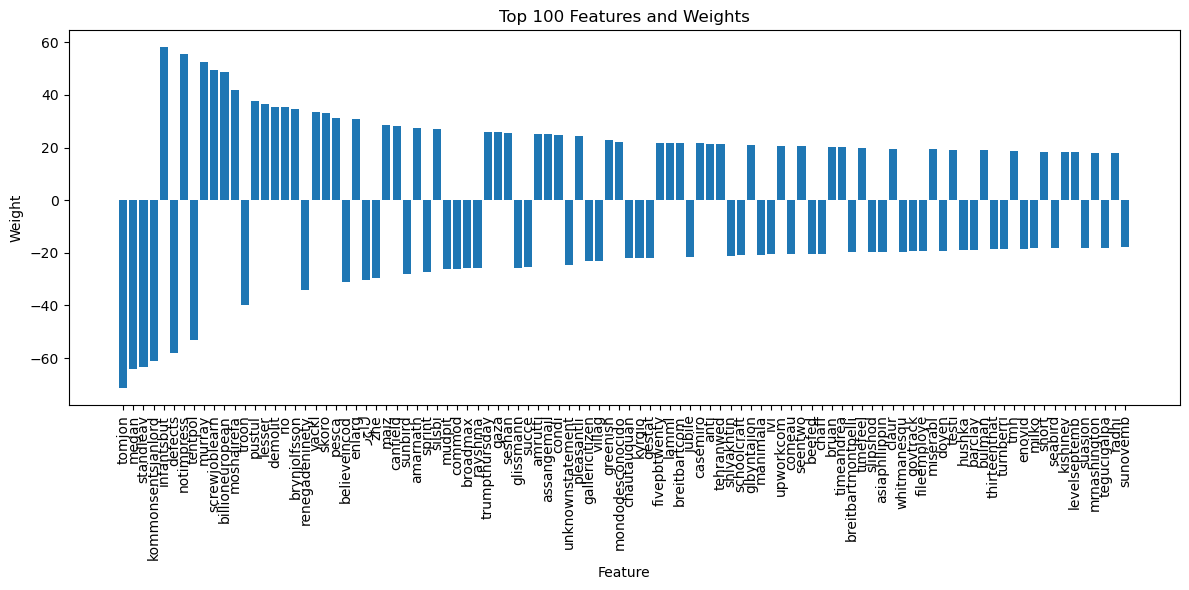

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_weights)), top_weights, align='center')
plt.xticks(range(len(top_weights)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 100 Features and Weights')
plt.tight_layout()
plt.show()

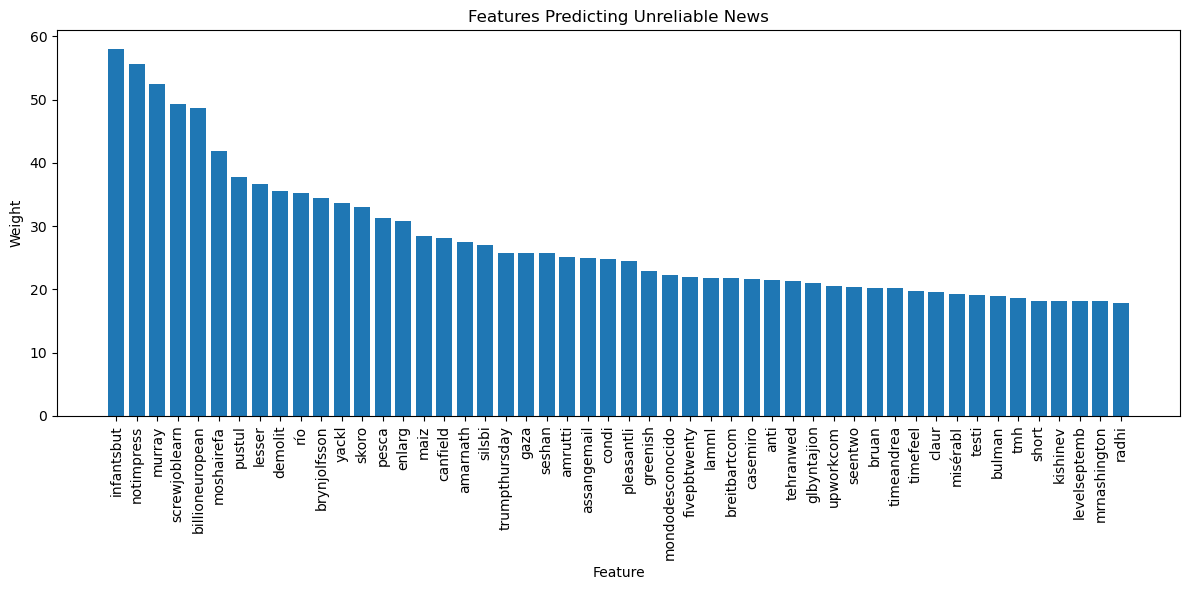

In [30]:
# Filter features that predict unreliable news (y = 1)
unreliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight > 0]

# Filter corresponding weights for unreliable features
unreliable_weights = [weight for weight in top_weights if weight > 0]

# Plot the feature weights for predicting unreliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(unreliable_weights)), unreliable_weights, align='center')
plt.xticks(range(len(unreliable_weights)), unreliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Unreliable News')
plt.tight_layout()
plt.show()

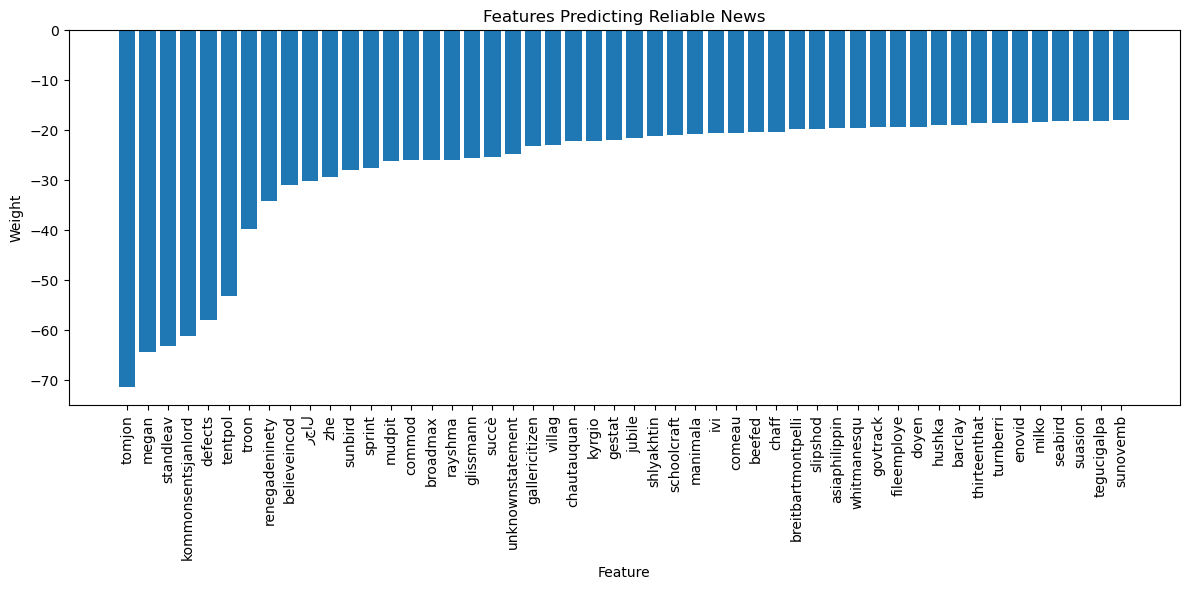

In [31]:
# Filter features that predict reliable news (y = 0)
reliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight < 0]

# Filter corresponding weights for reliable features
reliable_weights = [weight for weight in top_weights if weight < 0]

# Plot the feature weights for predicting reliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(reliable_weights)), reliable_weights, align='center')
plt.xticks(range(len(reliable_weights)), reliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Reliable News')
plt.tight_layout()
plt.show()

**With 1gram and 2gram**

Status: training LogisticRegression(C=100000.0) model using tf-idf-lemmatized data


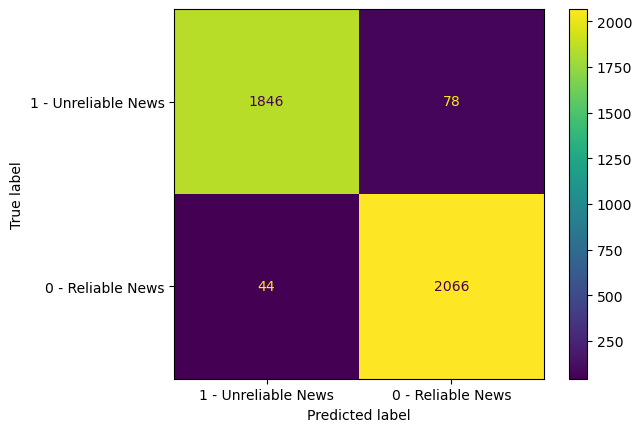

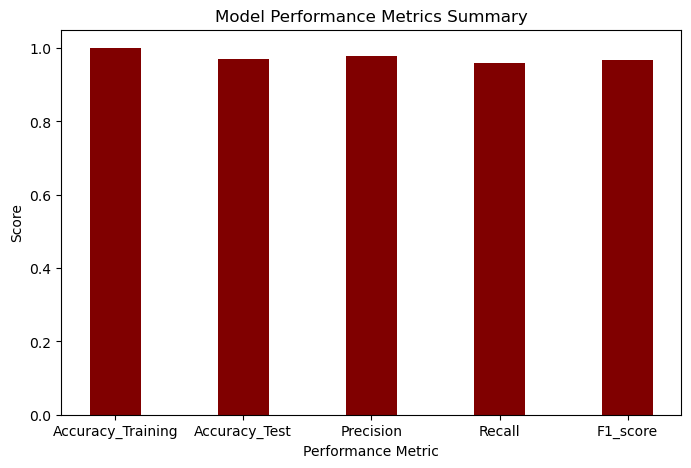

In [32]:
model = LogisticRegression(C=1e5)
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Checking Feature Importance - Top 100 features

In [33]:
#get feature names for count vectorizer
feature_names = list(tfidf_vectorizer_2gram.vocabulary_.keys())
#learned coeffs
coefficients = model.coef_[0]

#sort
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

#get the top 100
top_features = sorted_feature_names[:100]
top_weights = sorted_coefficients[:100]

for feature, weight in zip(top_features, top_weights):
    print("Feature: {}, Weight: {:.4f}".format(feature, weight))

Feature: leagu winchest, Weight: -84.7398
Feature: everywher si, Weight: -68.7560
Feature: irregular nune, Weight: -64.4150
Feature: point lot, Weight: -51.5352
Feature: abdolrasoul, Weight: -47.3254
Feature: syria hand, Weight: -46.2835
Feature: snowden launch, Weight: -40.2569
Feature: western teach, Weight: -39.2878
Feature: queer fuck, Weight: 37.6751
Feature: huge trump, Weight: 37.4075
Feature: obamacar quit, Weight: 36.7672
Feature: control crown, Weight: 36.4003
Feature: plant locat, Weight: 36.1465
Feature: rico mani, Weight: -36.0199
Feature: art manhattan, Weight: -34.3725
Feature: mr mont, Weight: 34.3263
Feature: travel recipi, Weight: -34.2085
Feature: car flash, Weight: -32.0673
Feature: jockey ayatollah, Weight: 31.9495
Feature: acceler econoday, Weight: -30.6628
Feature: use compromis, Weight: -30.2635
Feature: technolog fight, Weight: -30.0478
Feature: undress flanneri, Weight: 29.3266
Feature: jupit king, Weight: 27.9790
Feature: administr faster, Weight: 27.6244
Fea

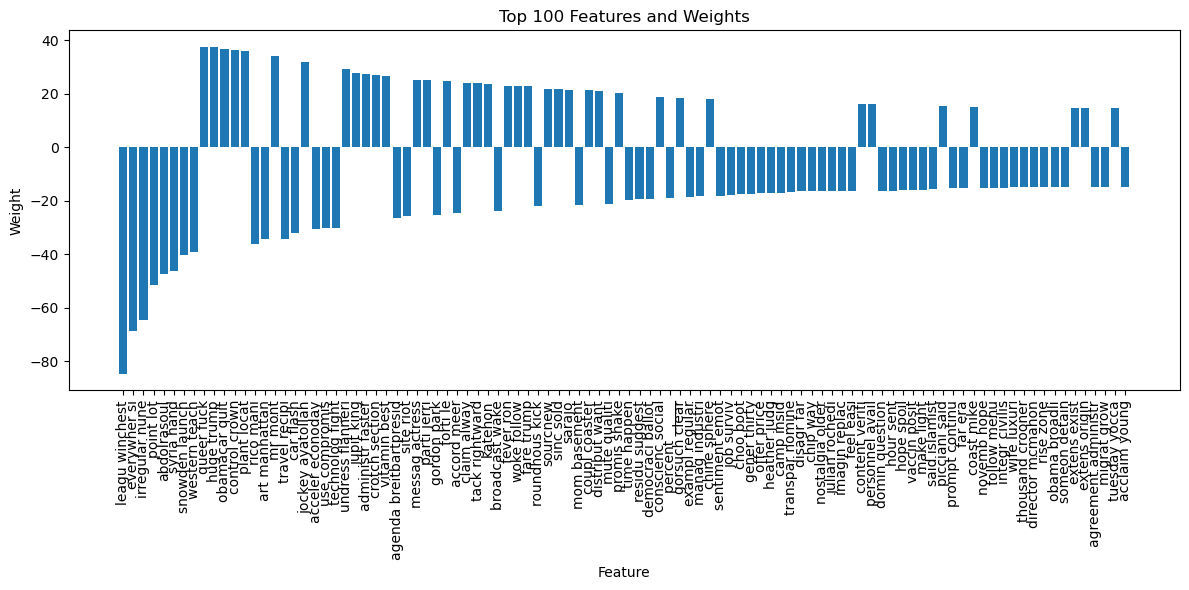

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_weights)), top_weights, align='center')
plt.xticks(range(len(top_weights)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 100 Features and Weights')
plt.tight_layout()
plt.show()

##### Features that predict unreliable news (y=1)

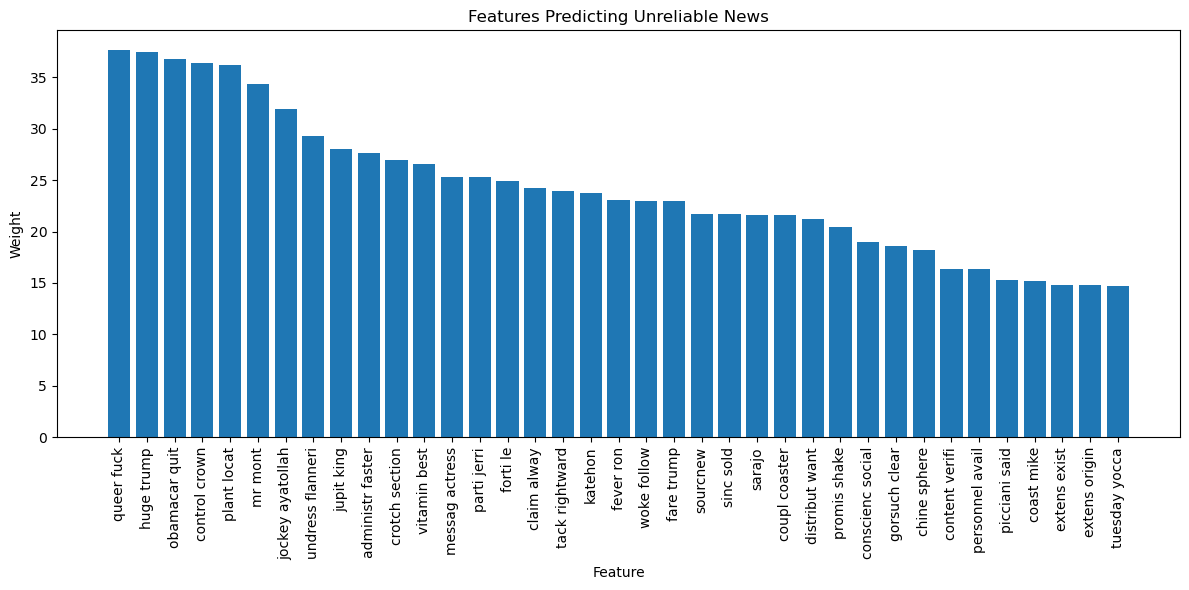

In [35]:
# Filter features that predict unreliable news (y = 1)
unreliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight > 0]

# Filter corresponding weights for unreliable features
unreliable_weights = [weight for weight in top_weights if weight > 0]

# Plot the feature weights for predicting unreliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(unreliable_weights)), unreliable_weights, align='center')
plt.xticks(range(len(unreliable_weights)), unreliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Unreliable News')
plt.tight_layout()
plt.show()

##### Features that predict reliable news (y = 0)

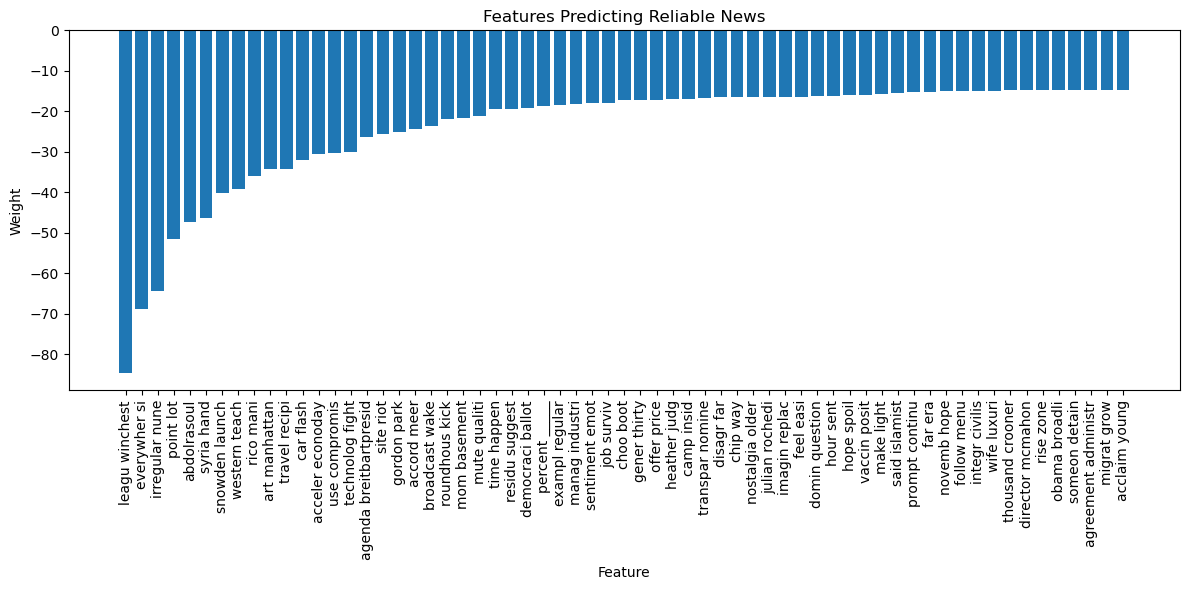

In [36]:
# Filter features that predict reliable news (y = 0)
reliable_features = [feature for feature, weight in zip(
    top_features, top_weights) if weight < 0]

# Filter corresponding weights for reliable features
reliable_weights = [weight for weight in top_weights if weight < 0]

# Plot the feature weights for predicting reliable news
plt.figure(figsize=(12, 6))
plt.bar(range(len(reliable_weights)), reliable_weights, align='center')
plt.xticks(range(len(reliable_weights)), reliable_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Features Predicting Reliable News')
plt.tight_layout()
plt.show()

When we run logistic regression with either 1gram or bigram, both of them seem to have a similar high accuracy. The predictors between them do completely change, with a less clear pattern in 1gram as compared to bigrams. For bigrams, the weights of unreliable news seem to be more far-right leaning (with high weights for 'queer f**k', 'obamacar quit', 'huge trump') with the ones for reliable news not having much of a pattern (eg: 'irregular nune' has the highest weight). 

Since this is the case in the training data, going forward, when the model is used to predict on unseen data, it would be biased towards predicting articles that were more right leaning to be unreliable. 

This provides us with the best accuracy score of all logistic regression models with false negatives relatively low at 44.

##### Checking Accuracy

Checking if Processed Articles are both in test and train

In [37]:
# Extract the unique identifiers for articles in the training and test sets
train_ids = set(X_train.index)
test_ids = set(X_test.index)

# Check if any articles appear in both the training and test sets
common_articles = train_ids.intersection(test_ids)

# Print the common articles if any
if common_articles:
    print("Articles appearing in both training and test sets:")
    for article_id in common_articles:
        print(article_id)
else:
    print("No processed articles appear in both training and test sets.")

No processed articles appear in both training and test sets.


Checking the number of Processed Articles that are more than 90% similar in both train and test (nearly identical to each other) using a TF-IDF Vectorizer

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
X_train, X_test, y_train, y_test = train_test_split(
    training_data.loc[:,'train_stem_lem_title_text'],
      training_data.label, test_size=0.20, random_state=0)
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Calculate cosine similarity between training and test articles
cos_sim = cosine_similarity(X_test_tfidf, X_train_tfidf)

# Count the number of articles with more than 90% similarity
num_similar_articles = 0
for i in range(len(cos_sim)):
    similar_indices = np.where(cos_sim[i] > 0.90)[0]
    if len(similar_indices) > 0:
        num_similar_articles += 1

print("Number of articles with more than 90% similarity:", num_similar_articles)

Number of articles with more than 90% similarity: 274


Out of 20,166 articles total, we have 274 articles that are similar between the training and test set (1.35%). 

In [39]:
# Review the articles with more than 99% similarity
#for i in range(len(cos_sim)):
    #similar_indices = np.where(cos_sim[i] > 0.99)[0]
   # if len(similar_indices) > 0:
        #print("Test Article ID:", X_test.index[i])
        #print("Test Article Text:")
        #print(X_test.iloc[i])
       # print()
        #print("Similar Training Articles:")
       # for idx in similar_indices:
            #print("Train Article ID:", X_train.index[idx])
            #print("Train Article Text:")
            #print(X_train.iloc[idx])
            #print()
        #print("============================")

Based on going through the text of articles that are similar (between test and train), we see that they are covering the same topics. As a result, the order in which the words in the similar articles is different. Since they are not complete duplicates of one another, we decided to leave the articles as is. 

NOTE: We commented out the actual codeblock above since it would take too much space in our output to print out the entire string of text. If needed, please uncomment it out and run the code. 

### Conducting k-fold cross validation

K-fold cross-validation is a robust technique to evaluate the model's performance and assess its generalization capabilities. It helps to mitigate the impact of the specific train-test split and provides a more reliable estimate of the model's accuracy on unseen data.

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression()

k = 10  # number of folds
scores = cross_val_score(model, tfidf_train_2gram, y_train, cv=k)

for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Compute the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Fold 1: 0.9417596034696406
Fold 2: 0.9405204460966543
Fold 3: 0.9572225666460012
Fold 4: 0.949163050216987
Fold 5: 0.9442033477991321
Fold 6: 0.9411035337879727
Fold 7: 0.9448233106013639
Fold 8: 0.9566026038437694
Fold 9: 0.9330440173589585
Fold 10: 0.9342839429634222
Mean Accuracy: 0.9442726422783903


The mean accuracy across all folds is 0.944. These scores indicate the performance of the model on different subsets of the training data. The relatively consistent accuracy scores suggest that the model is performing consistently well across the folds and is not overfitting the training data.


#### Regularized Logistic Regression with count vectorization:

We did both L2 and L1 regularization. 

L1 regularization can help remove irrelevant or redundant features from the model. This can be especially useful when dealing with high-dimensional data where the number of features is large compared to the number of samples. However, L1 regularization can result in a sparse model with some coefficients being zero. 

On the other hand, L2 regularization encourages the model coefficients to be small but non-zero, resulting in a smoother and more stable model. It can be a better choice when there are many features that are potentially relevant to the target variable, but none of them is particularly important on its own. 

Since we read that it is better to try both L1 and L2 regularization and compare their performance on a validation set, we have conducted both below.

L2 regularization with count vectorization

Status: training LogisticRegression(C=1) model using count-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


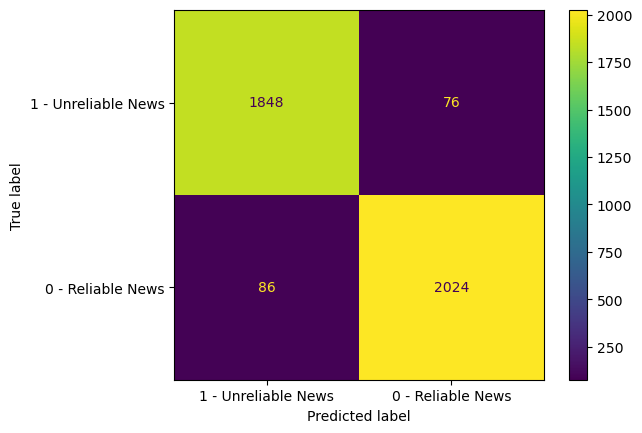

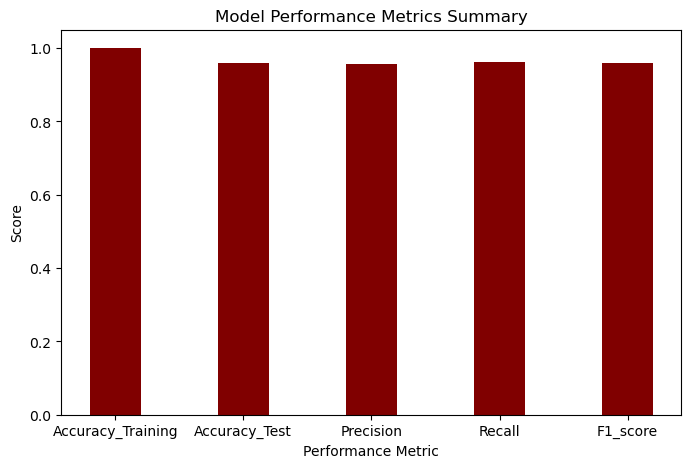

In [41]:
model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1]

L1 regularization with count vectorization

Status: training LogisticRegression(C=1, penalty='l1', solver='liblinear') model using count-lemmatized data


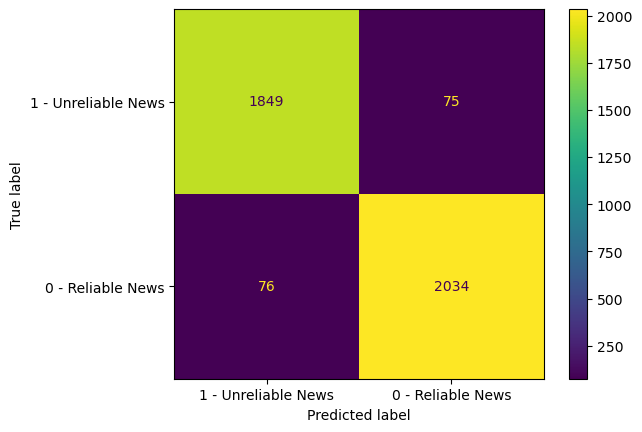

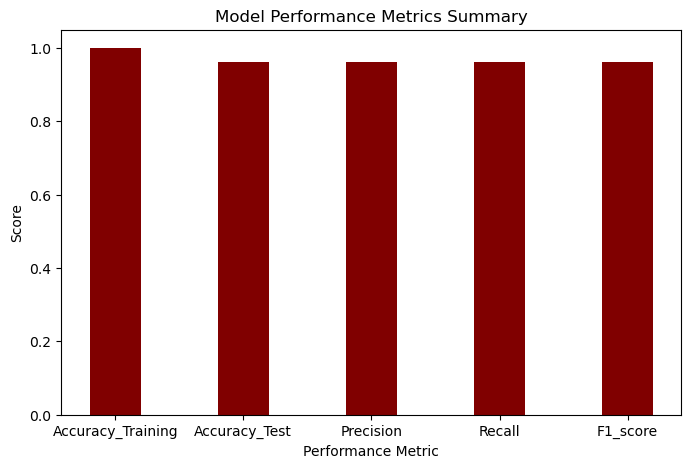

In [42]:
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

The L1-regularized logistic regression model achieved a slightly higher accuracy (0.962) compared to the L2-regularized model (0.960). Additionally, the L1-regularized model resulted in the lowest less false negatives and positives compared to the other two. Overall, though, the difference in performance between the count vectorization models is not very large in this case.

#### TF-IDF Vectorization with Regularization

l1 regularized logistic regression using TF-IDF vectorizer

Status: training LogisticRegression(C=1, penalty='l1', solver='liblinear') model using tf-idf-lemmatized data


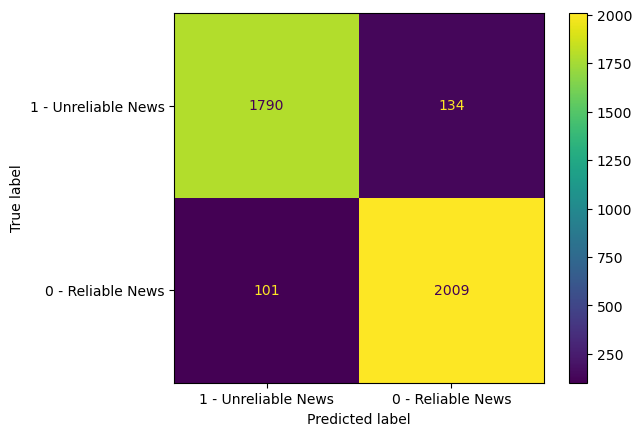

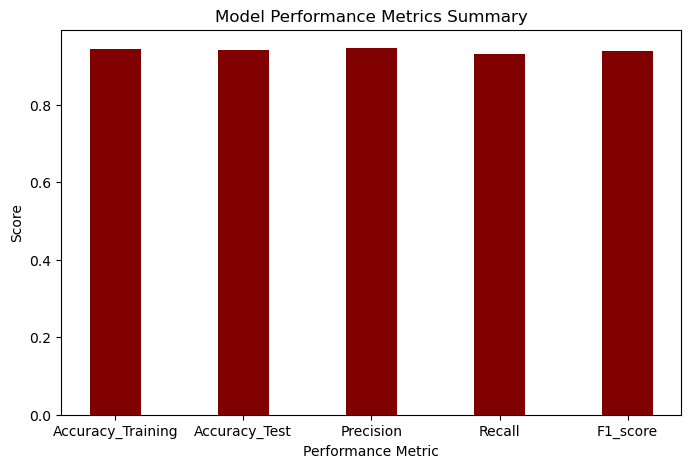

In [43]:
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

l2 regularized logistic regression using TF-IDF vectorizer

Status: training LogisticRegression(C=1) model using tf-idf-lemmatized data


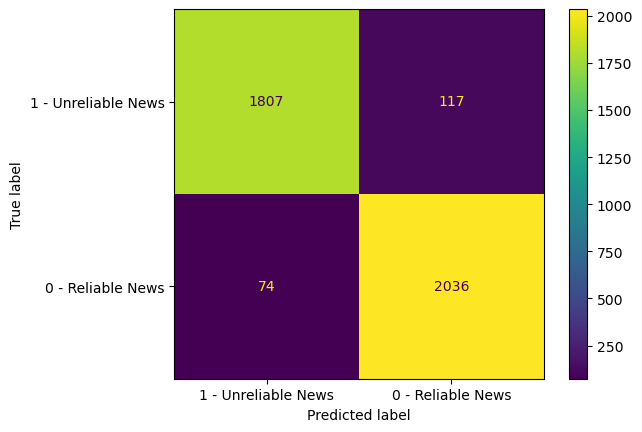

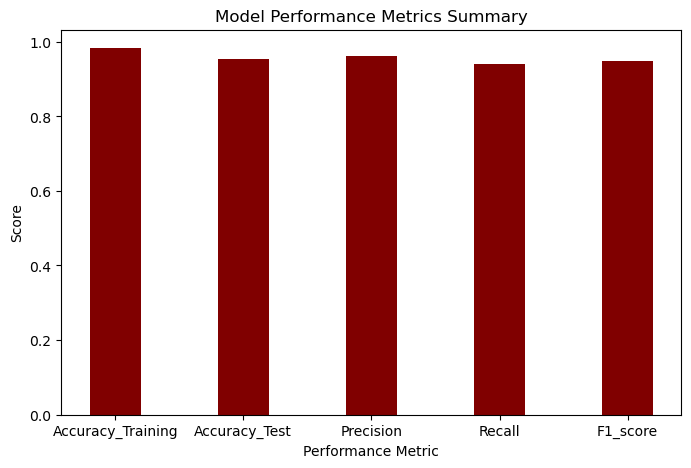

In [44]:
model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

L2 regularization seems to perform better with higher accuracy and less false negatives in the predicted values. 

Using the TF-IDF vectorization to predict fake news for logistic regression with regularization reduces accuracy, but might be better to prevent overfitting and improve the generalization performance of the model.

### Passive Aggressive Classifier

Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting, similar to the way a perceptron updates its weights. The amount of update is controlled by a parameter called the aggressiveness parameter, which determines how much the model parameters should change to correct the mistake. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector. The updates are designed to minimize the loss while causing very little change in the norm of the weight vector, which can help prevent overfitting and improve the generalization performance of the model. It is useful when the number of examples is large, as is the case in this dataset when predicting fake news.

After trying multiple other max_iterations, we decided to keep the number of iterations at 7 since we wanted to avoid overfitting while allowing the model to train itself well. Accordingly, seven iterations seemed enough for the model to learn the patterns in the data and achieve good accuracy without becoming too specialized to the training data.

#### Passive Aggressive Classifier using Count Vectorization

##### Tuning hyperparameter

To find the best value for max iterations in the PassiveAggressiveClassifier model and visualize the performance metrics, we tried different values of max_iter and plotted the corresponding metric values.

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=1) model using tf-idf-lemmatized data


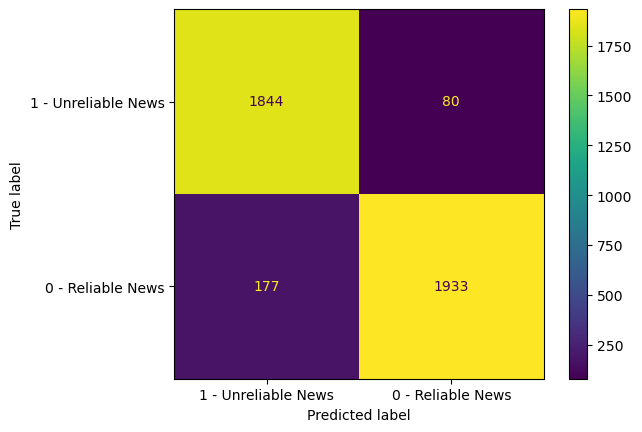

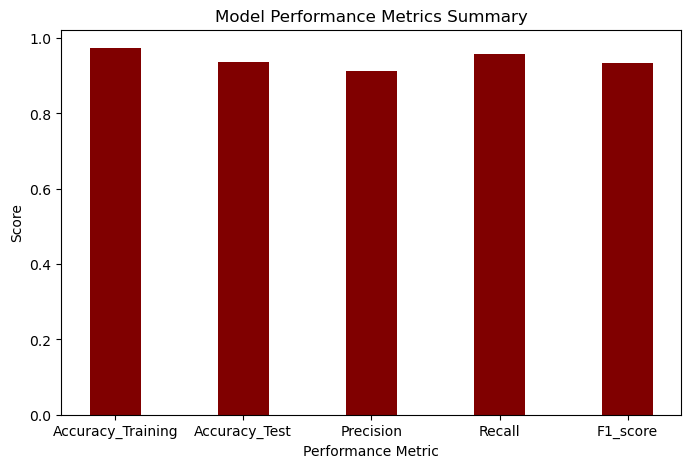

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=2) model using tf-idf-lemmatized data


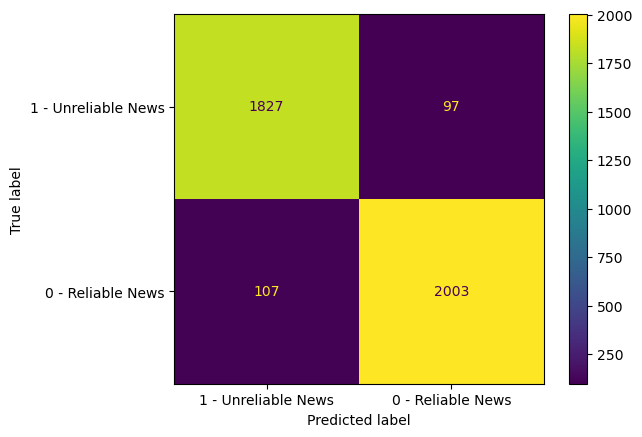

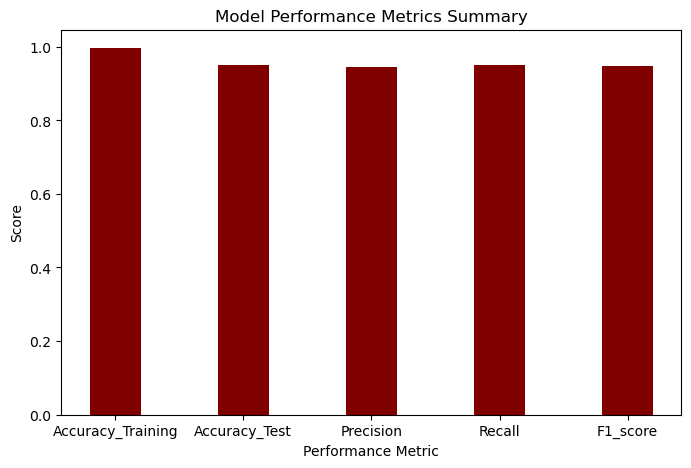

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=3) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


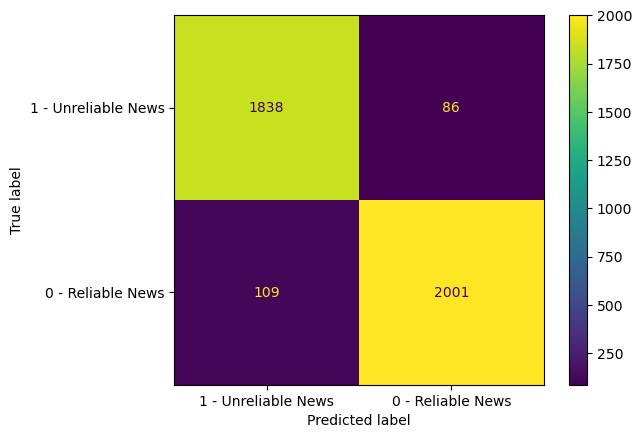

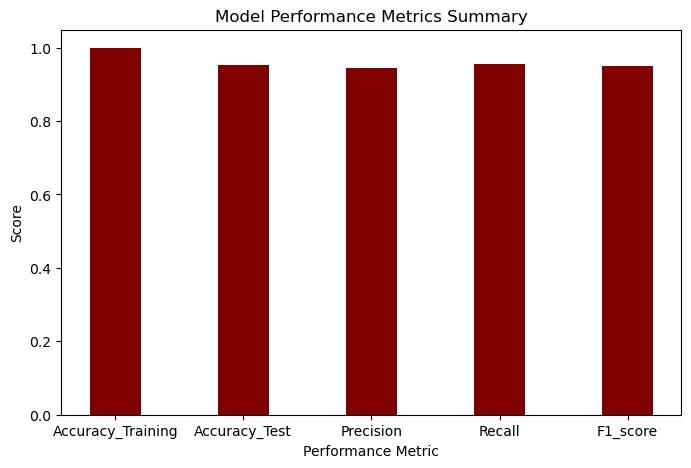

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=4) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


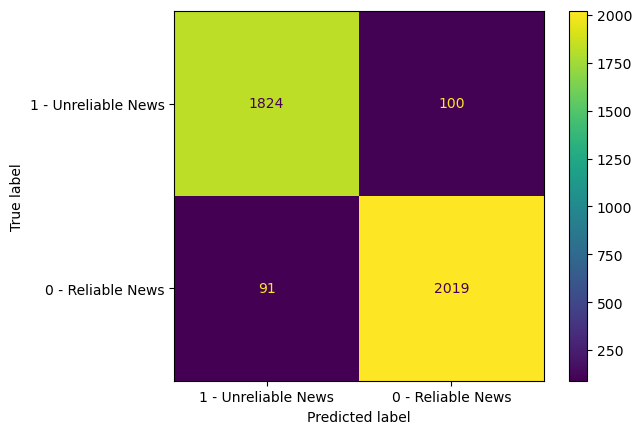

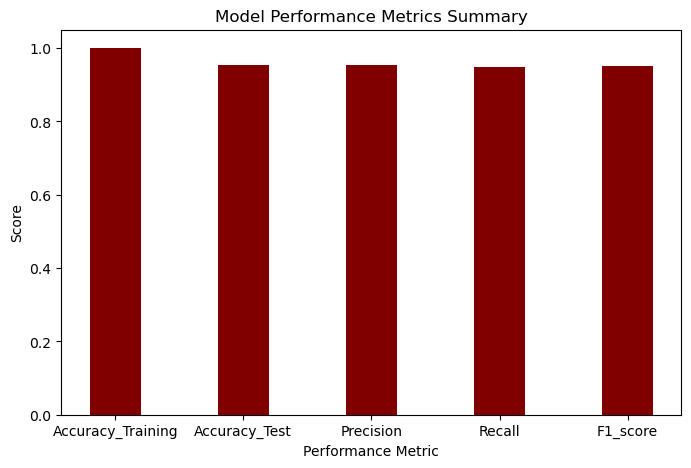

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=5) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


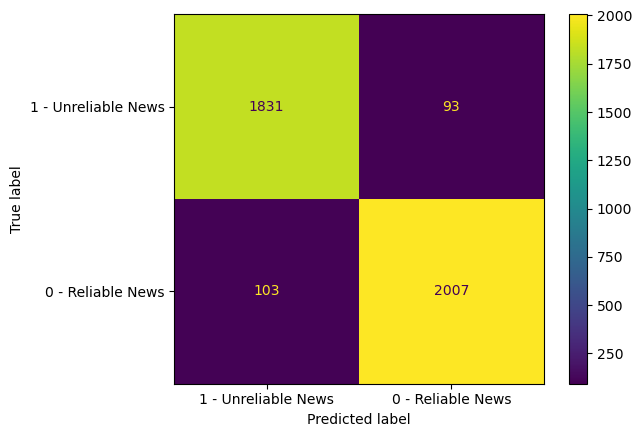

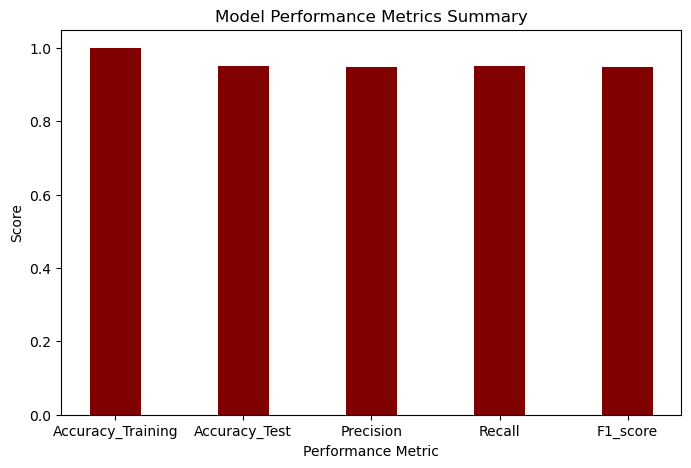

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=6) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


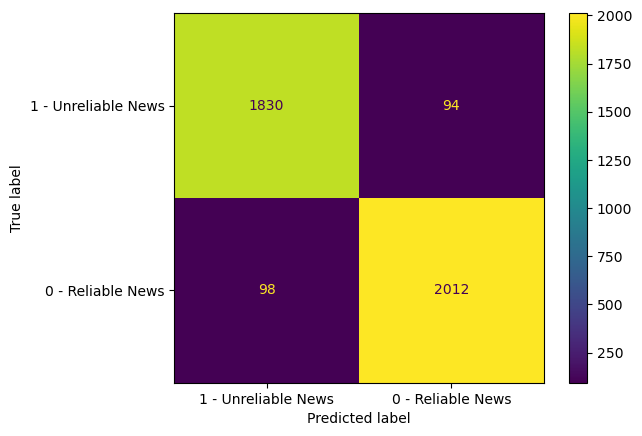

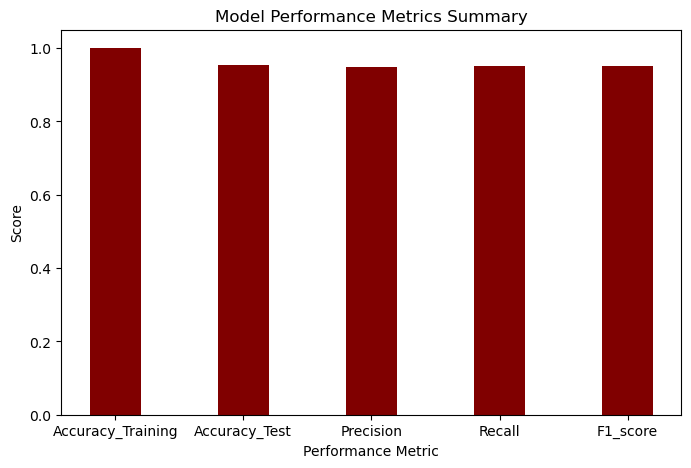

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=7) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


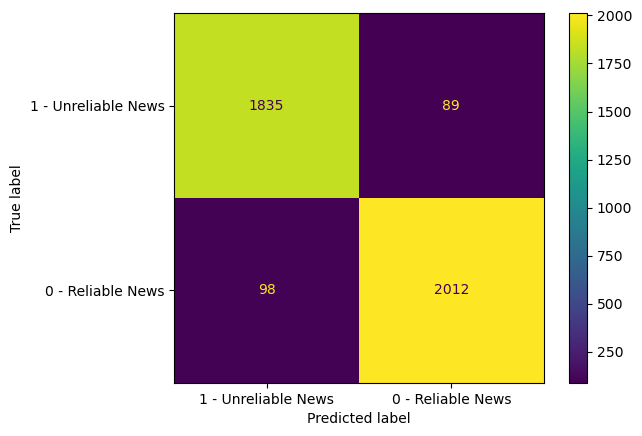

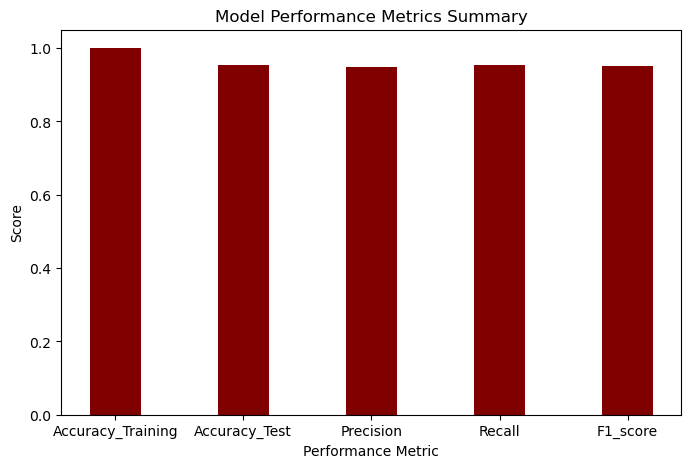

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=8) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


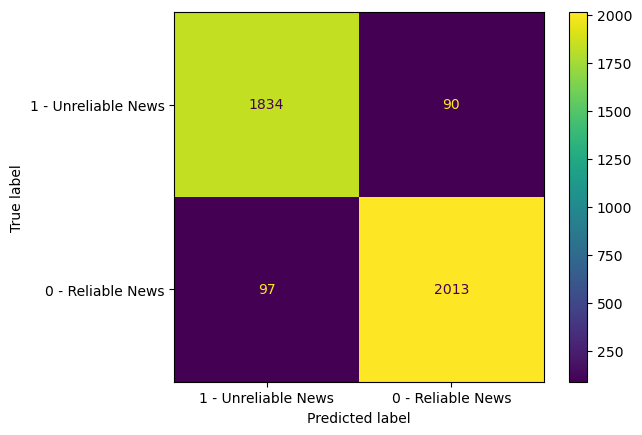

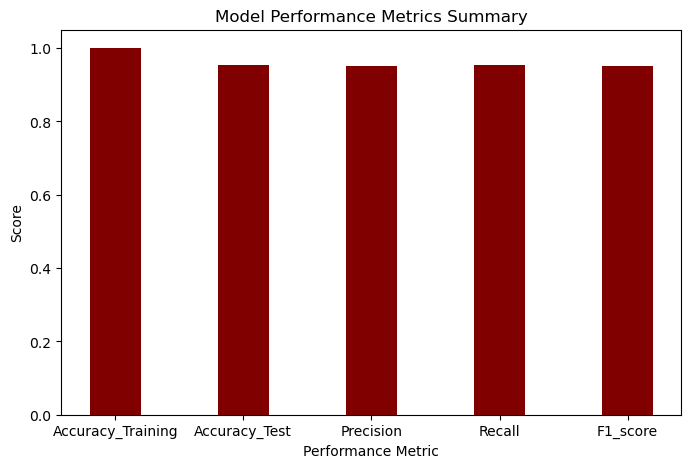

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=9) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


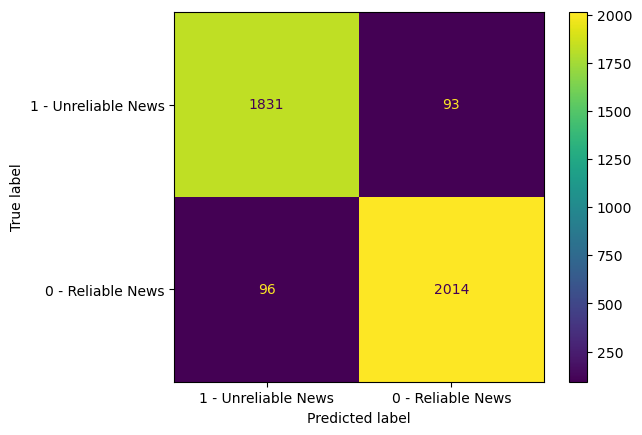

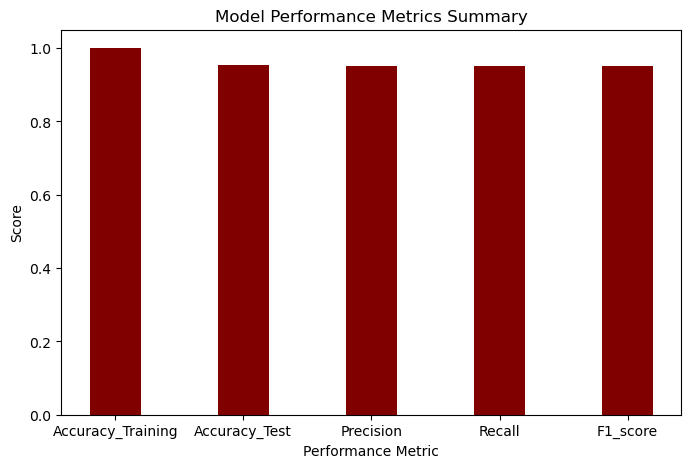

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=10) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


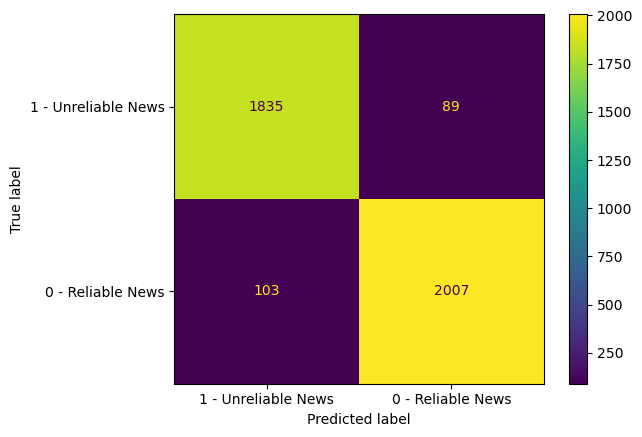

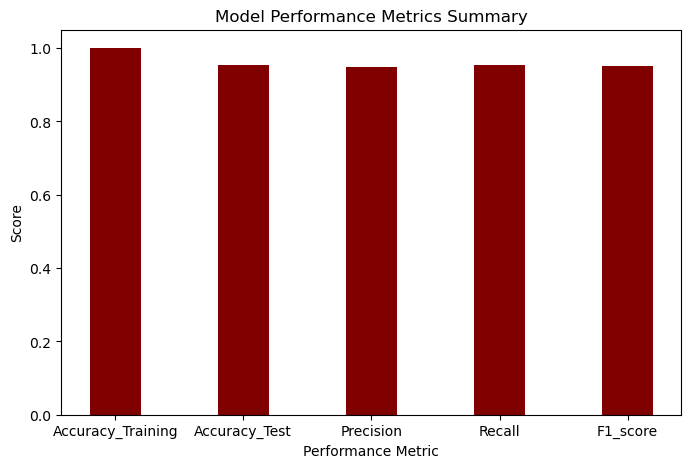

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=11) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


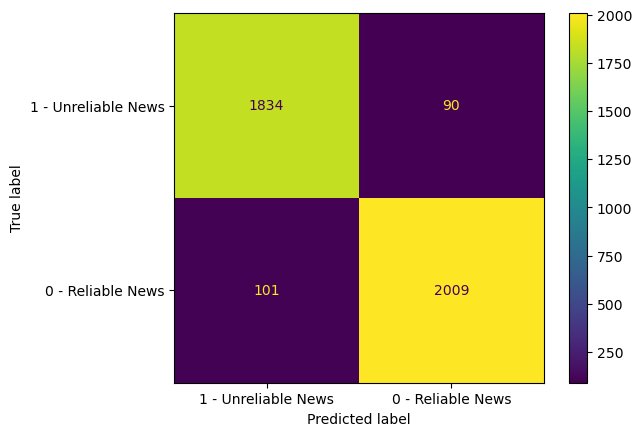

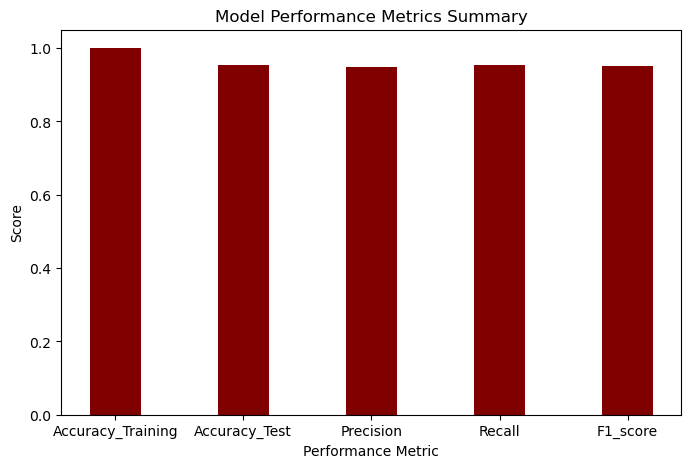

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=12) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


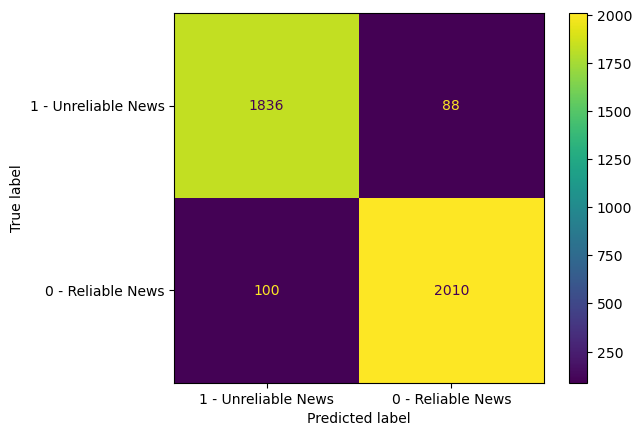

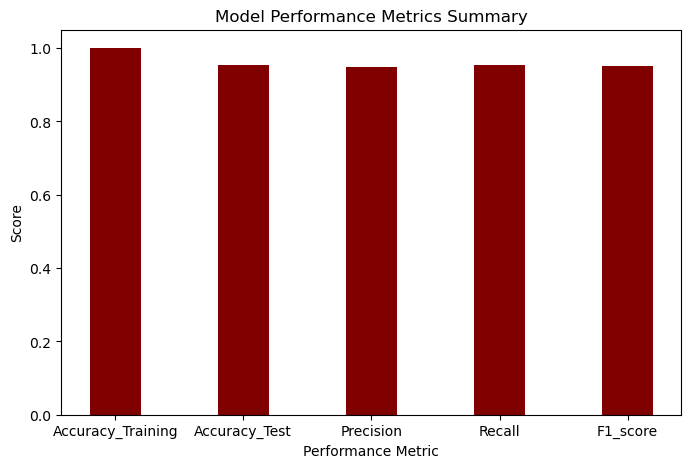

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=13) model using tf-idf-lemmatized data


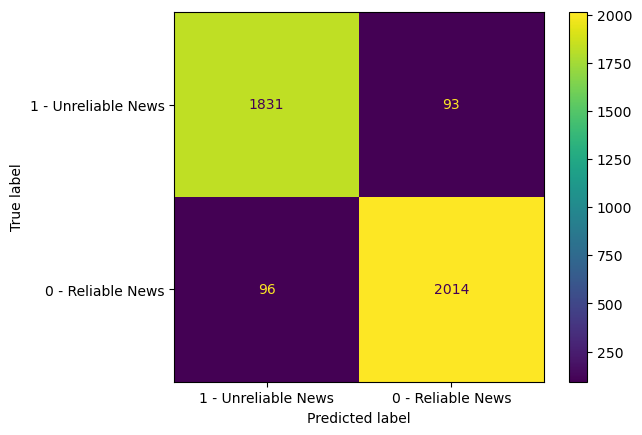

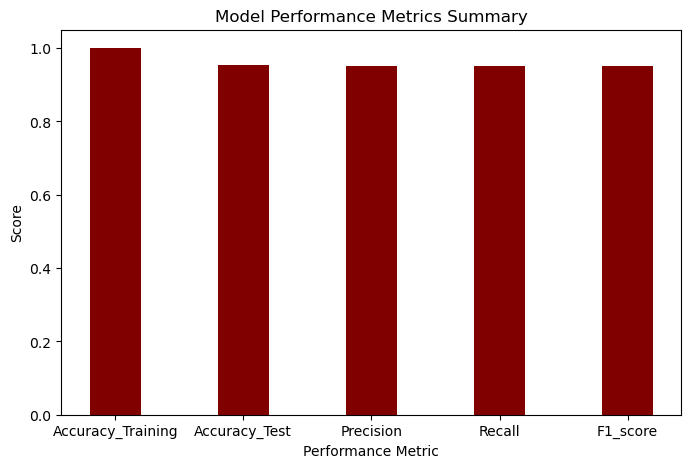

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=14) model using tf-idf-lemmatized data


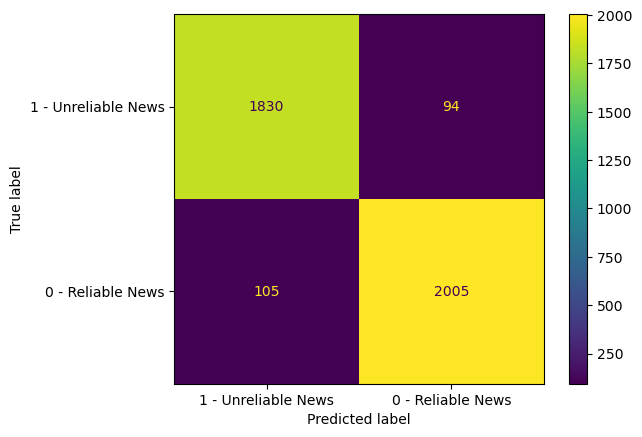

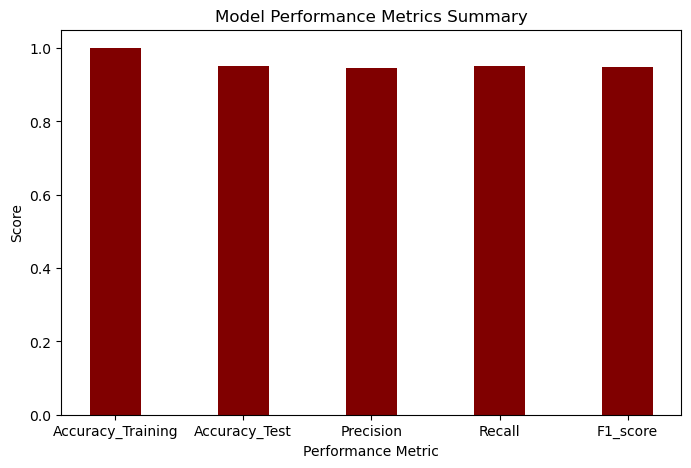

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=15) model using tf-idf-lemmatized data


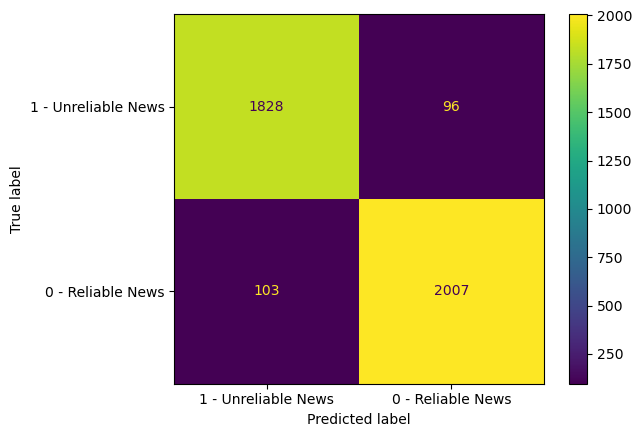

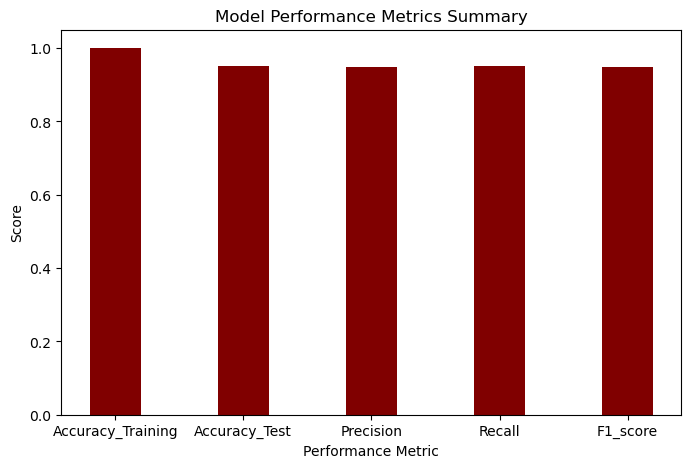

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=16) model using tf-idf-lemmatized data


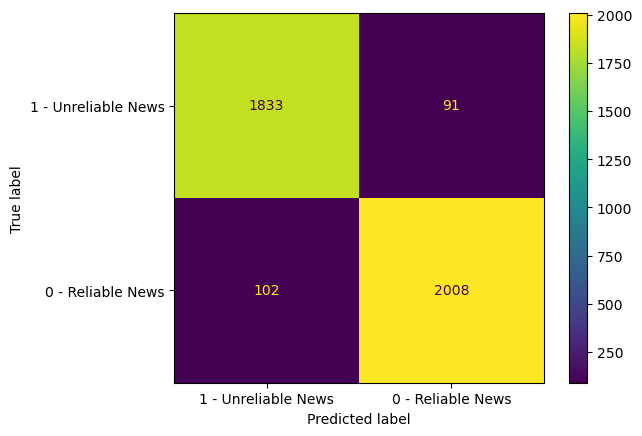

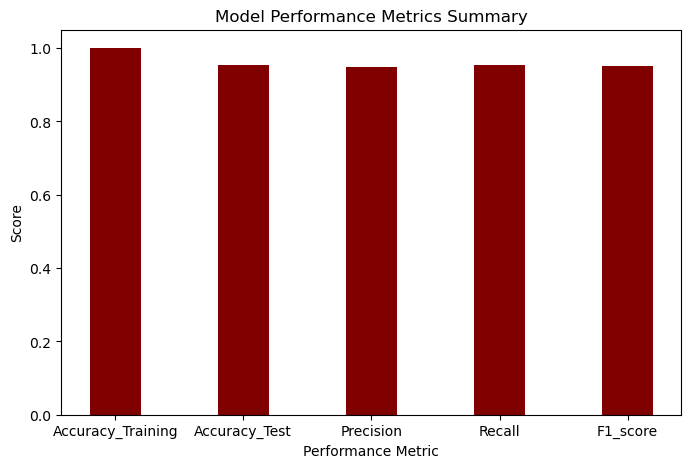

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=17) model using tf-idf-lemmatized data


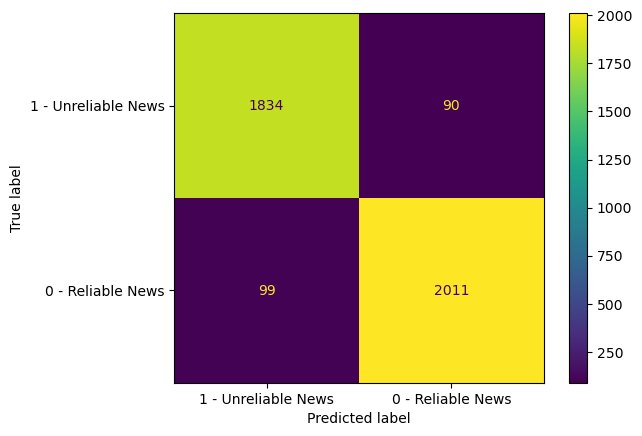

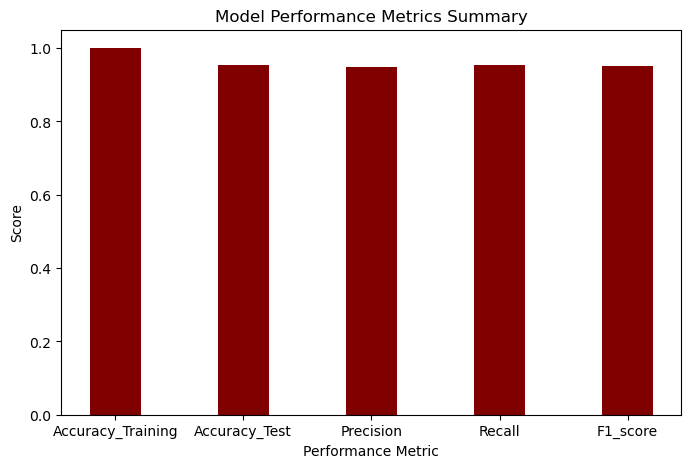

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Status: training PassiveAggressiveClassifier(max_iter=18) model using tf-idf-lemmatized data


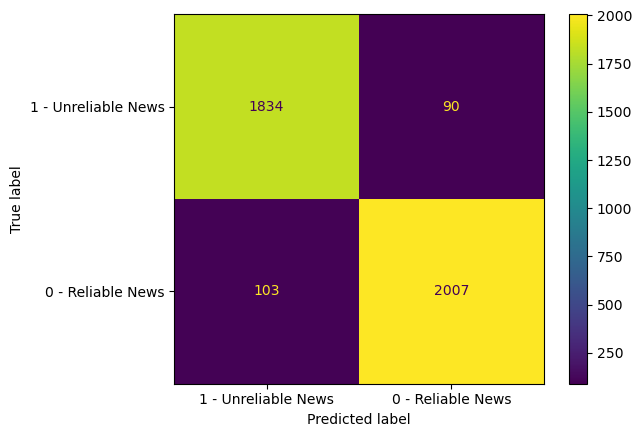

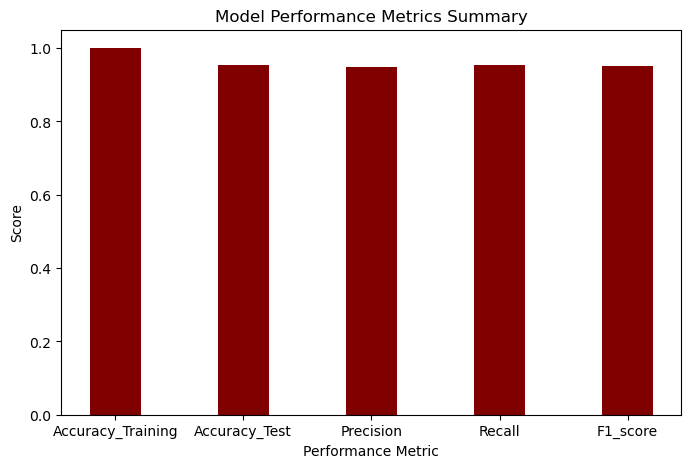

Status: training PassiveAggressiveClassifier(max_iter=19) model using tf-idf-lemmatized data


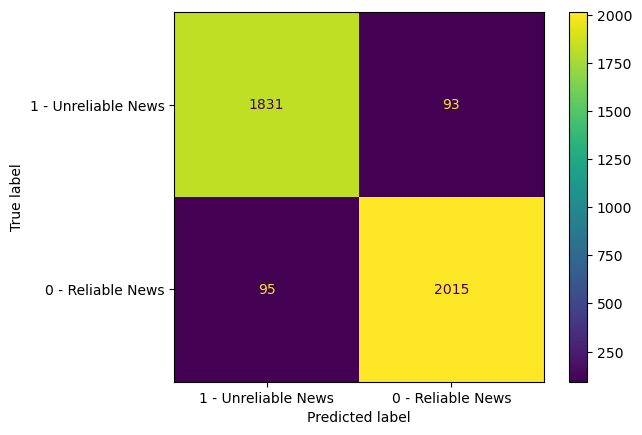

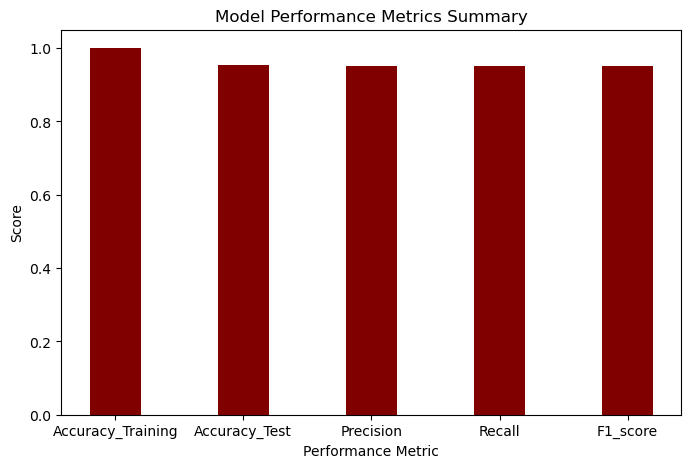

Status: training PassiveAggressiveClassifier(max_iter=20) model using tf-idf-lemmatized data


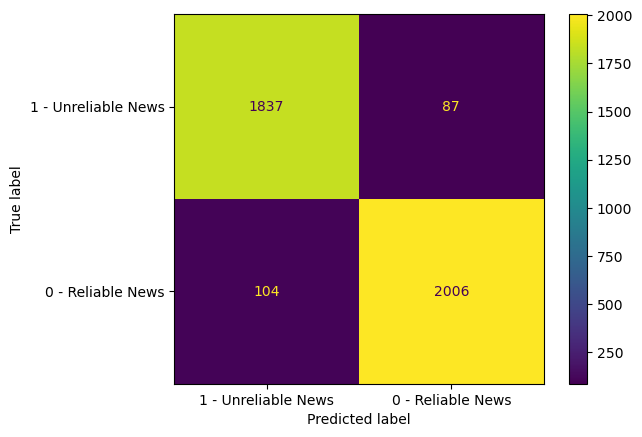

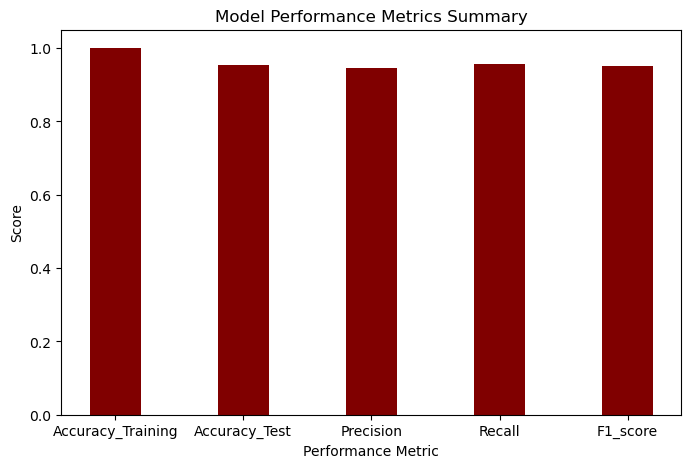

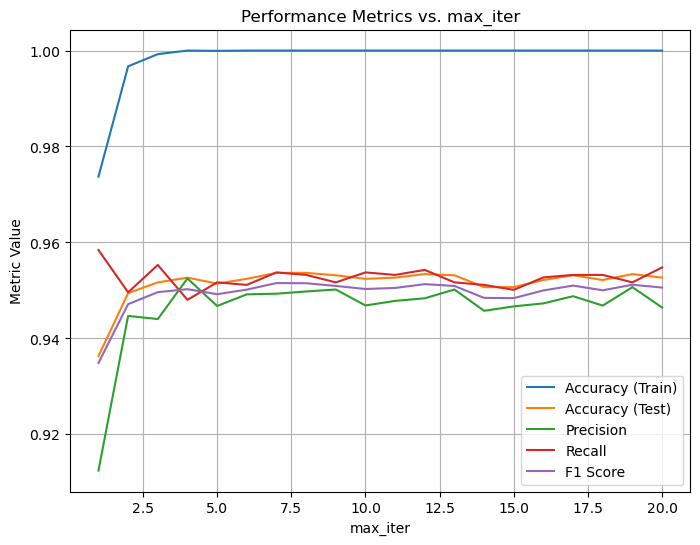

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier

# Define the range of max_iter values to try
max_iter_values = np.arange(1, 21)

# Initialize empty lists to store the metric values
accuracy_train_values = []
accuracy_test_values = []
precision_values = []
recall_values = []
f1_values = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Create a new model with the current max_iter value
    model = PassiveAggressiveClassifier(max_iter=max_iter)

    # Fit the model on the training data
    model.fit(count_train, y_train)

    # Evaluate the model on the training and test data
    #accuracy_train = model.score(count_train, y_train)
    #accuracy_test = model.score(count_test, y_test)
    accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
        data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

    # Append the metric values to the respective lists
    accuracy_train_values.append(accuracy_train)
    accuracy_test_values.append(accuracy_test)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the metric values against max_iter values
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, accuracy_train_values, label='Accuracy (Train)')
plt.plot(max_iter_values, accuracy_test_values, label='Accuracy (Test)')
plt.plot(max_iter_values, precision_values, label='Precision')
plt.plot(max_iter_values, recall_values, label='Recall')
plt.plot(max_iter_values, f1_values, label='F1 Score')
plt.xlabel('max_iter')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. max_iter')
plt.legend()
plt.grid(True)
plt.show()


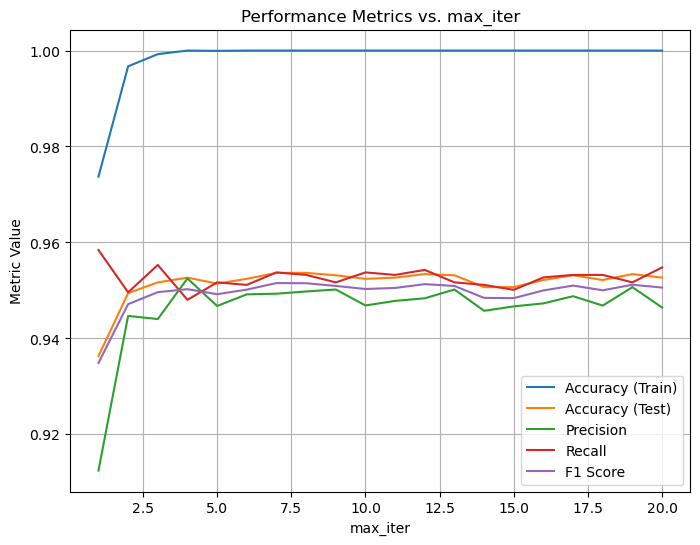

In [46]:
# Plot the metric values against max_iter values
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, accuracy_train_values, label='Accuracy (Train)')
plt.plot(max_iter_values, accuracy_test_values, label='Accuracy (Test)')
plt.plot(max_iter_values, precision_values, label='Precision')
plt.plot(max_iter_values, recall_values, label='Recall')
plt.plot(max_iter_values, f1_values, label='F1 Score')
plt.xlabel('max_iter')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. max_iter')
plt.legend()
plt.grid(True)
plt.show()

We can see that the optimum maximum iterations is around 7. 

Status: training PassiveAggressiveClassifier(max_iter=7) model using count-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


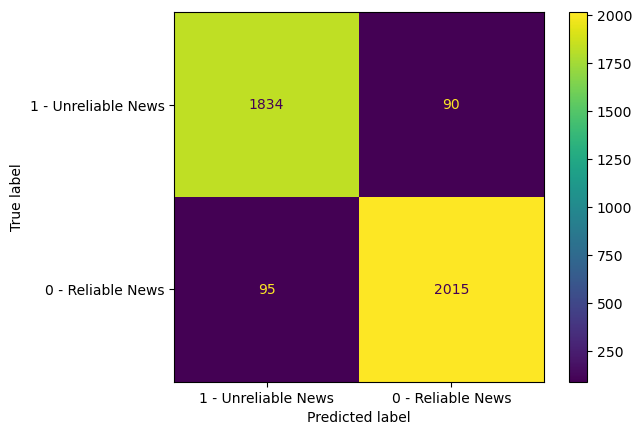

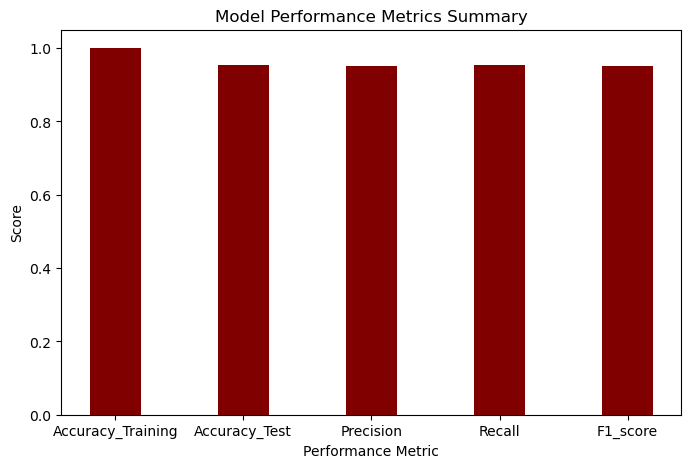

In [47]:
model = PassiveAggressiveClassifier(max_iter=7)
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Passive Aggressive Classifier using TF-IDF Vectorization

Status: training PassiveAggressiveClassifier(max_iter=7) model using tf-idf-lemmatized data


/Users/Shwetha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


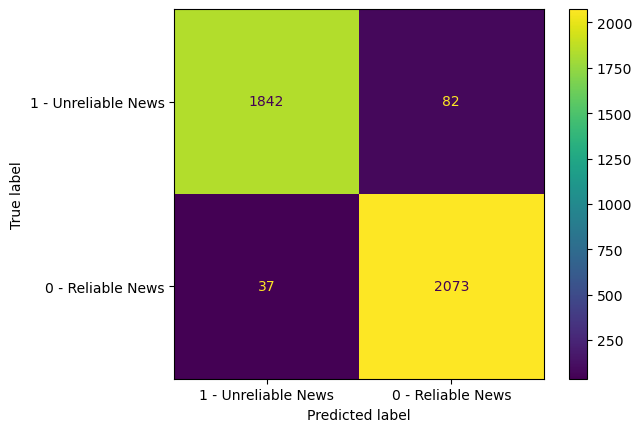

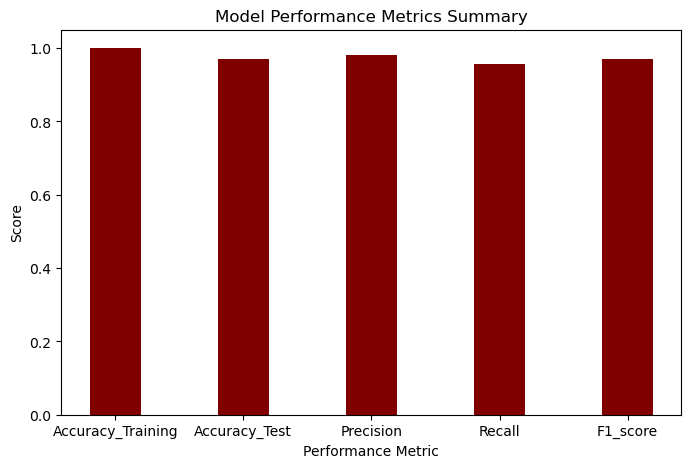

In [48]:
model = PassiveAggressiveClassifier(max_iter=7)
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1]

Passive aggressive classifiers provide great accuracy, a bit higher also as compared to logistic regression. However, they do classify more false positives and false negatives.

#### Naive Bayes using Count Vectorization

Naive Bayes is a popular machine learning algorithm for detecting fake news because of its simplicity, efficiency, and effectiveness. The algorithm works well in situations where the data has a large number of features and the features are independent of each other, as is the case in natural language processing tasks like fake news detection. The algorithm can effectively model the many different factors that might be indicative of fake news, such as the language used in the article, the sources cited, and the overall sentiment. As Naive Bayes is a probabilistic algorithm, it  assigns probabilities to different outcomes. This  allows the algorithm to not only detect whether an article is fake, but also to quantify how likely it is to be fake. 

We have used multinomial Naive Bayes as it performs well on text classification tasks, can handle missing data well and is robust to irrelevant features.

Status: training MultinomialNB() model using count-lemmatized data


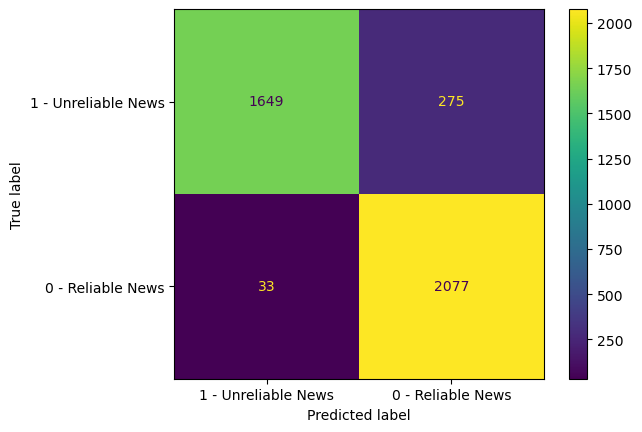

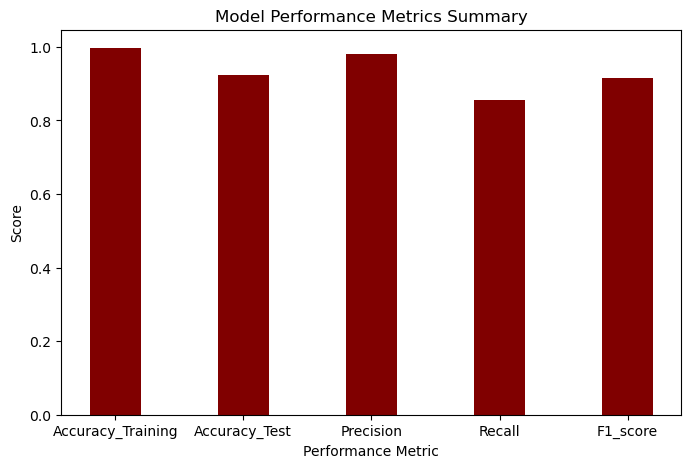

In [50]:
model_nb = MultinomialNB()

data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_nb, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_nb, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Naive Bayes using TF-IDF Vectorizer

Status: training MultinomialNB() model using tf-idf-lemmatized data


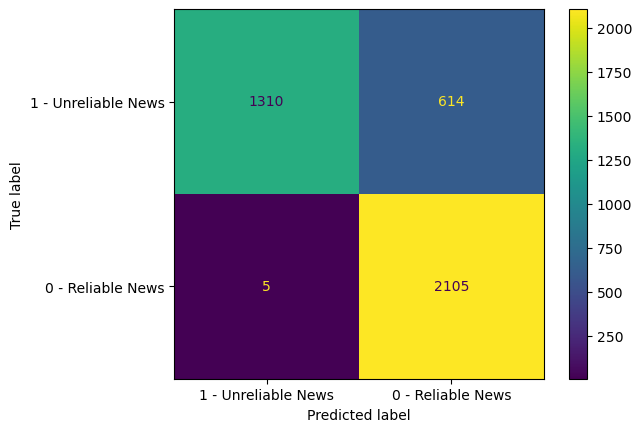

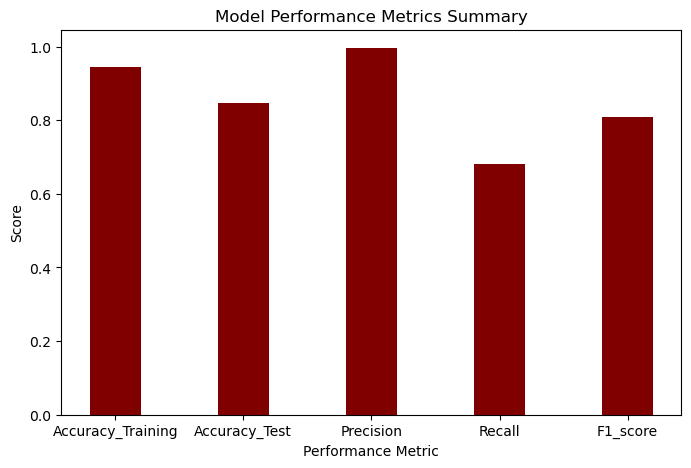

In [51]:
model_nb = MultinomialNB()

data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_nb, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_nb, accuracy_train, 
    accuracy_test, precision, recall, f1]

#### Top Features for Navie Bayes Model

In [63]:

feature_names = list(count_vectorizer_2gram.vocabulary_.keys())
neg_class_prob_sorted = model_nb.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = model_nb.feature_log_prob_[1, :].argsort()[::-1]

neg_class_top_features = np.take(feature_names, neg_class_prob_sorted[:30])
pos_class_top_features = np.take(feature_names, pos_class_prob_sorted[:30])

# Print top features and their corresponding probabilities for the negative class
print("Top Features for Reliable News:")
for feature in neg_class_top_features:
    feature_index = feature_names.index(feature)
    feature_prob = model_nb.feature_log_prob_[0, feature_index]
    print(f"Feature: {feature}\t\tProbability: {feature_prob}")



Top Features for Reliable News:
Feature: everywher si		Probability: -9.023673288704806
Feature: leagu winchest		Probability: -9.364940168406655
Feature: mann sir		Probability: -9.503520667643997
Feature: eighti georg		Probability: -9.944442634037713
Feature: messag actress		Probability: -10.180234268159094
Feature: acceler econoday		Probability: -10.23715385785798
Feature: technolog fight		Probability: -10.240964435496526
Feature: vaccin learn		Probability: -10.256227064993457
Feature: sentenc appeal		Probability: -10.260470535823139
Feature: bednov went		Probability: -10.439995065689674
Feature: quarter hous		Probability: -10.440796924340372
Feature: hut wind		Probability: -10.553472888442432
Feature: difficult pain		Probability: -10.5733656923917
Feature: accord meer		Probability: -10.636616298331102
Feature: abdolrasoul		Probability: -10.697526880498947
Feature: syria hand		Probability: -10.70609209554436
Feature: investig journal		Probability: -10.718698300250697
Feature: forti mex

In [64]:
# Print top features and their corresponding probabilities for the positive class
print("\nTop Features for Unreliable News:")
for feature in pos_class_top_features:
    feature_index = feature_names.index(feature)
    feature_prob = model_nb.feature_log_prob_[1, feature_index]
    print(f"Feature: {feature}\t\tProbability: {feature_prob}")


Top Features for Unreliable News:
Feature: vitamin best		Probability: -9.763882430654377
Feature: mann sir		Probability: -9.87125228498386
Feature: messag actress		Probability: -9.97148016546332
Feature: mr mont		Probability: -10.09437106508178
Feature: claim alway		Probability: -10.347968687785416
Feature: sentenc appeal		Probability: -10.399204961127278
Feature: control crown		Probability: -10.546658278739425
Feature: vaccin learn		Probability: -10.549391166586469
Feature: quarter hous		Probability: -10.553396633421812
Feature: jockey ayatollah		Probability: -10.587199407655334
Feature: anthoni davi		Probability: -10.591119139500456
Feature: reconcil brown		Probability: -10.604916744310053
Feature: woke follow		Probability: -10.615600766351932
Feature: justic summarili		Probability: -10.699660767614418
Feature: rubbish negoti		Probability: -10.738396128634207
Feature: presid libr		Probability: -10.763061782881227
Feature: investig journal		Probability: -10.770279666583875
Feature: d

#### Support Vector Machines (SVM) using Count Vectorizer

Support Vector Machines (SVMs) work by finding the best hyperplane that separates the training data into different classes, with the goal of maximizing the margin between the two classes. 

SVMs have been used for fake news detection with some success, especially when the classification problem is highly nonlinear and the data has a large number of features. SVMs can be particularly useful when dealing with imbalanced datasets, where there are many more examples of one class than the other, as SVMs can often achieve good performance even with limited data from the minority class. SVMs can be sensitive to the choice of hyperparameters, such as the regularization parameter and kernel type, which can make them more difficult to tune and optimize than some other classification algorithms.

We have implemented a linear SVM as data on fake news prediction is linearly separable and has low computational cost making it a simple, interpretable model for fake news detection.

Status: training SVC(kernel='linear') model using count-lemmatized data


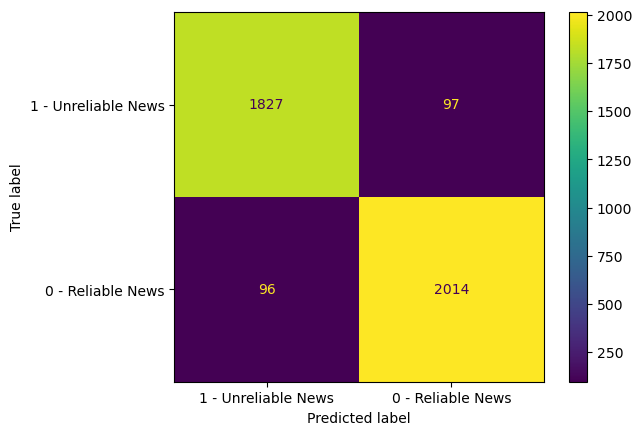

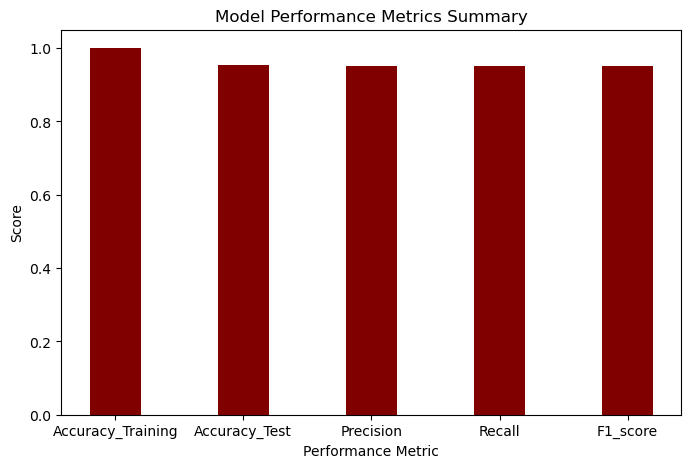

In [54]:
model = svm.SVC(kernel='linear')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Support Vector Machines Using TF-IDF Vectorizer

Status: training SVC(kernel='linear') model using tf-idf-lemmatized data


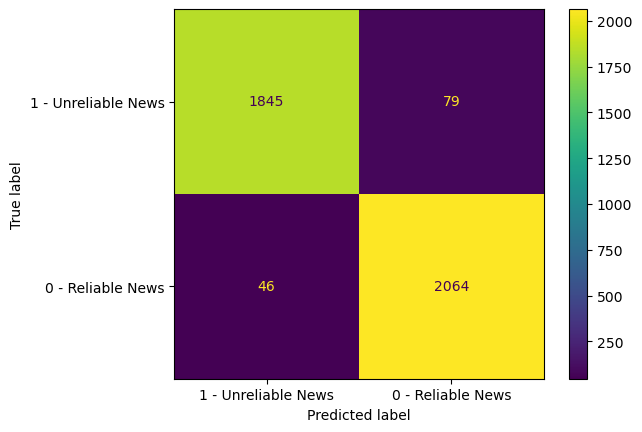

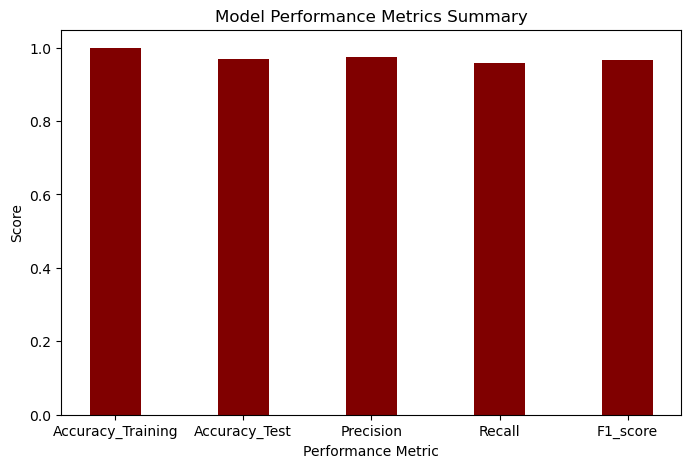

In [80]:
model = svm.SVC(kernel='linear')
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1]

SVM using Polynomial Kernel

Status: training SVC(kernel='poly') model using count-lemmatized data


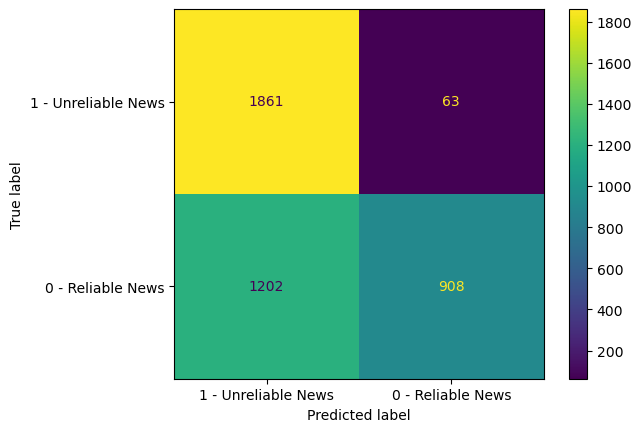

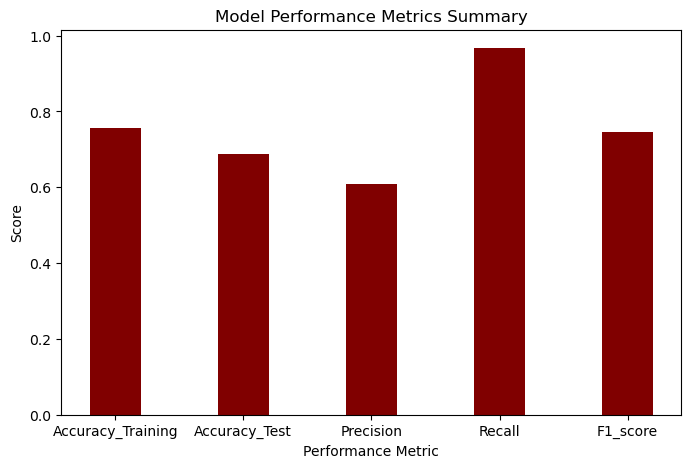

In [81]:
model_poly = svm.SVC(kernel='poly', degree=3)
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_poly, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_poly, accuracy_train, 
    accuracy_test, precision, recall, f1] 

SVM using Gaussian Radial Basis Function Kernel

Status: training SVC() model using count-lemmatized data


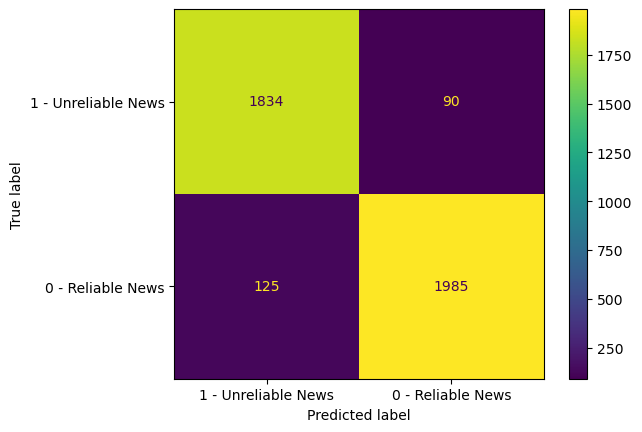

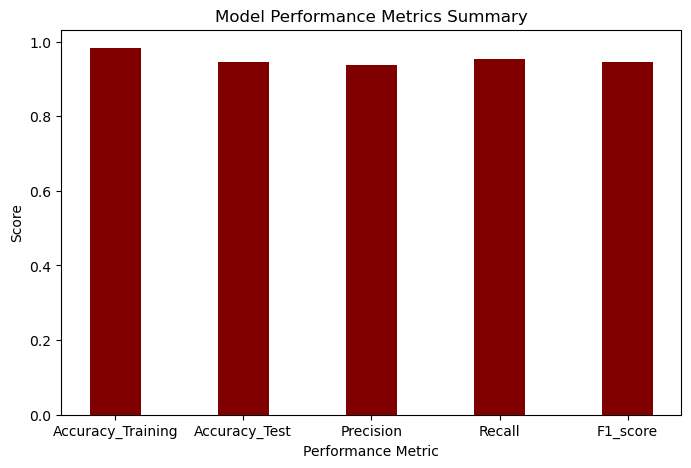

In [ ]:
model_rbf = svm.SVC(kernel='rbf')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rbf, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rbf, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Random Forests using Count Vectorizer

Random forests are a type of ensemble learning method that combine multiple decision trees to make a final prediction. Each decision tree in the random forest is built independently on a subset of the training data and a subset of the features, and the final prediction is made by combining the predictions of all the individual trees.

There are some important features of random forests that make it a suitable model for fake news prediction. Random forests are less prone to overfitting and as a result have better accuracy. They can also provide insights on which features are important for classification. 

Status: training RandomForestClassifier(n_estimators=25, random_state=0) model using tf-idf-lemmatized data


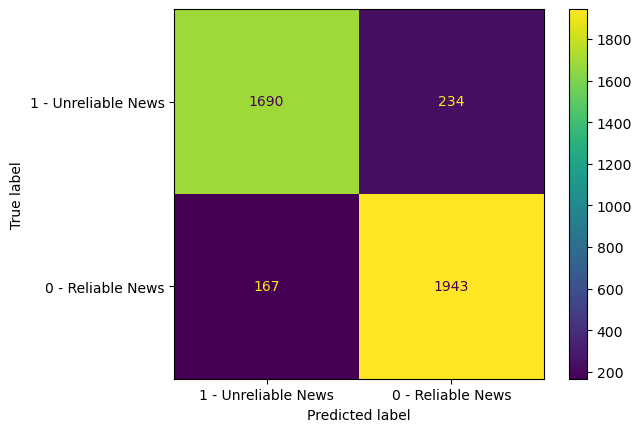

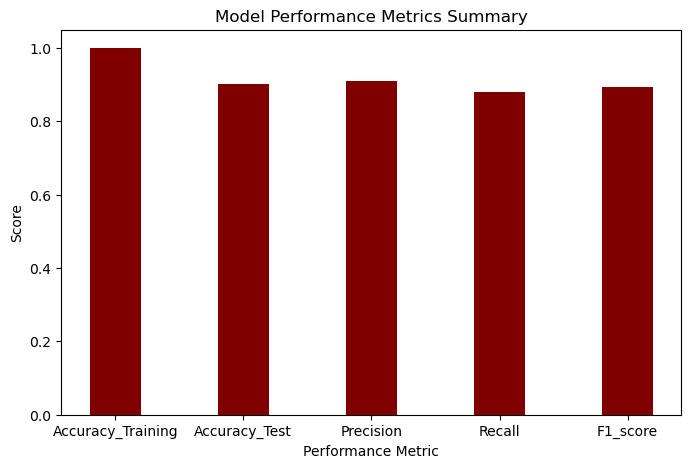

Status: training RandomForestClassifier(n_estimators=50, random_state=0) model using tf-idf-lemmatized data


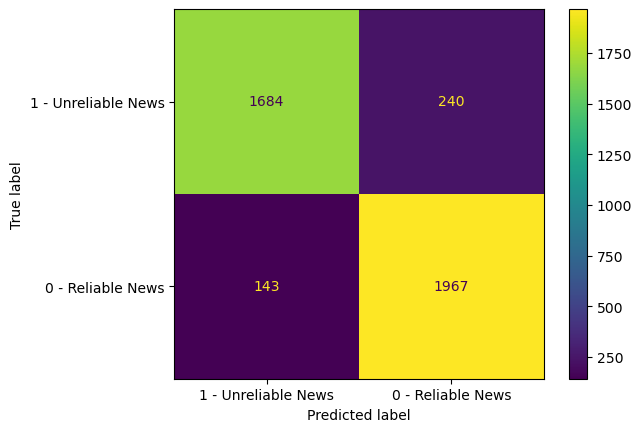

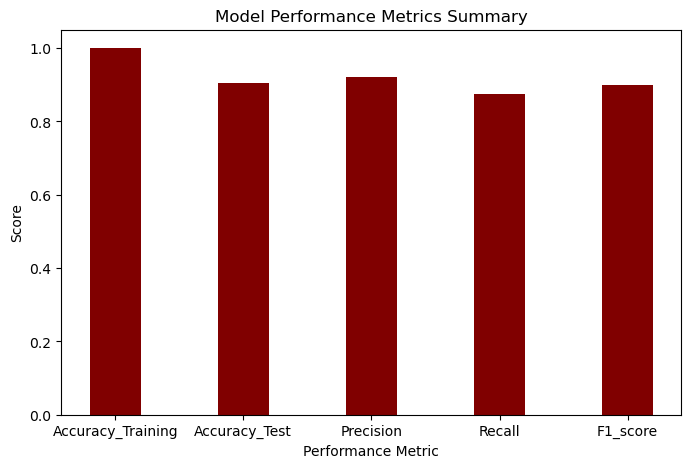

Status: training RandomForestClassifier(n_estimators=75, random_state=0) model using tf-idf-lemmatized data


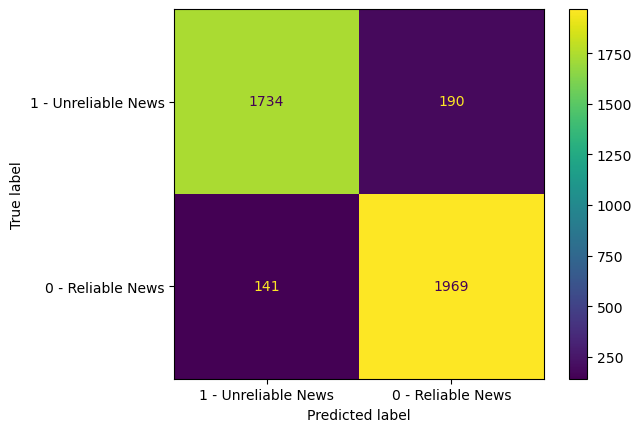

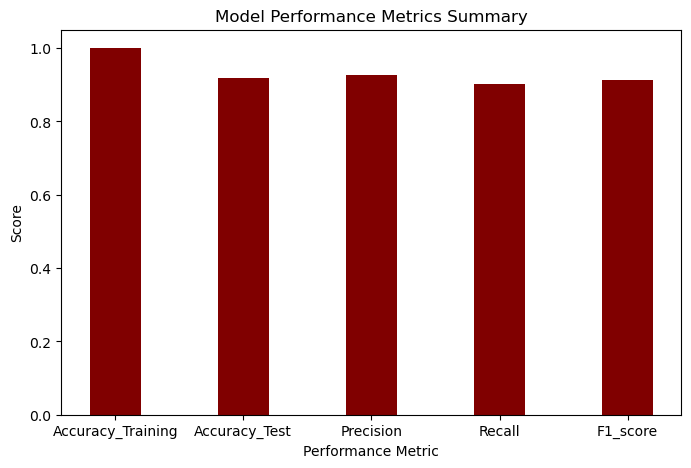

Status: training RandomForestClassifier(random_state=0) model using tf-idf-lemmatized data


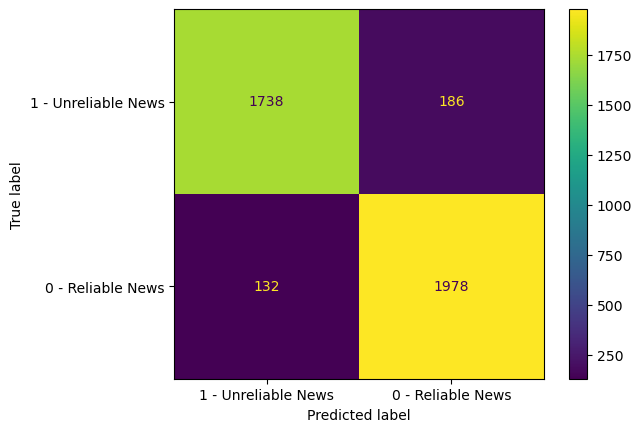

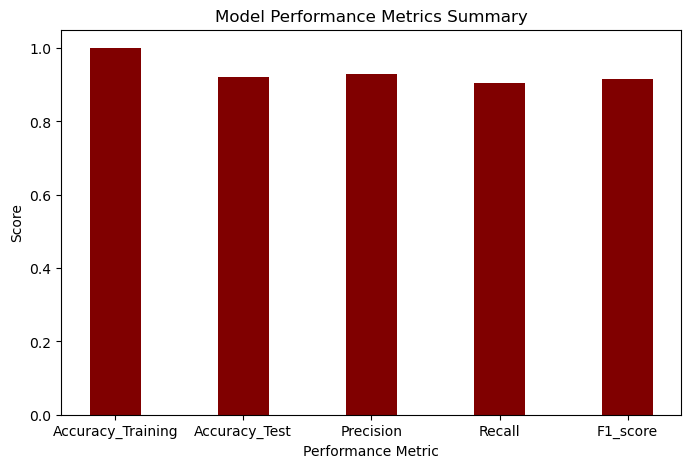

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using tf-idf-lemmatized data


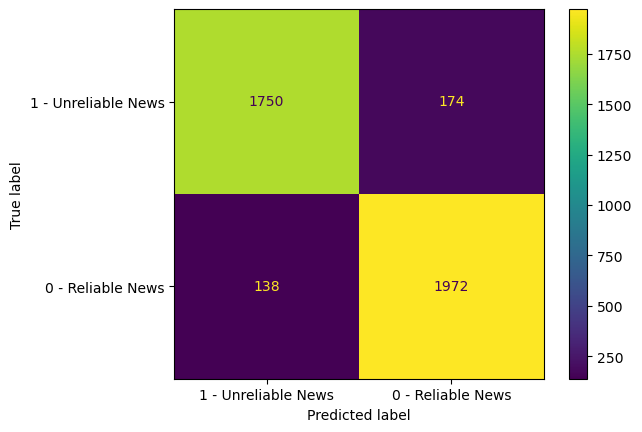

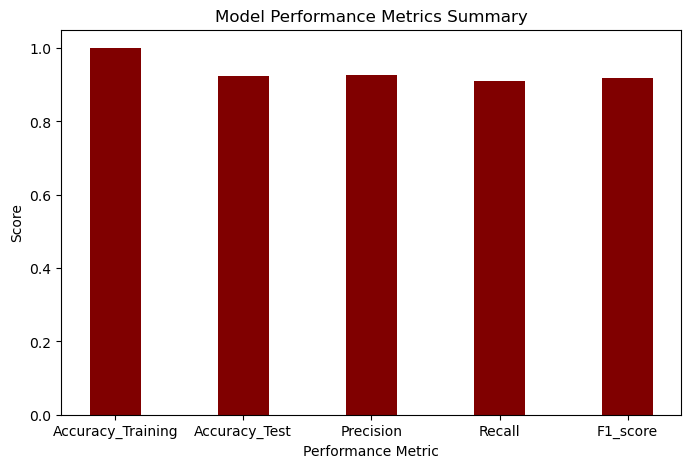

Status: training RandomForestClassifier(n_estimators=150, random_state=0) model using tf-idf-lemmatized data


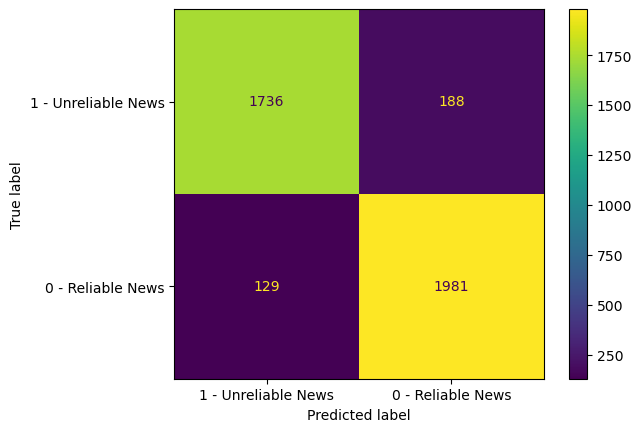

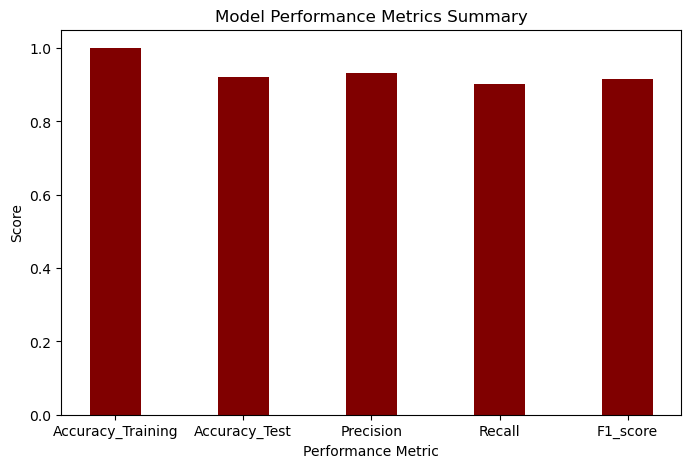

Status: training RandomForestClassifier(n_estimators=175, random_state=0) model using tf-idf-lemmatized data


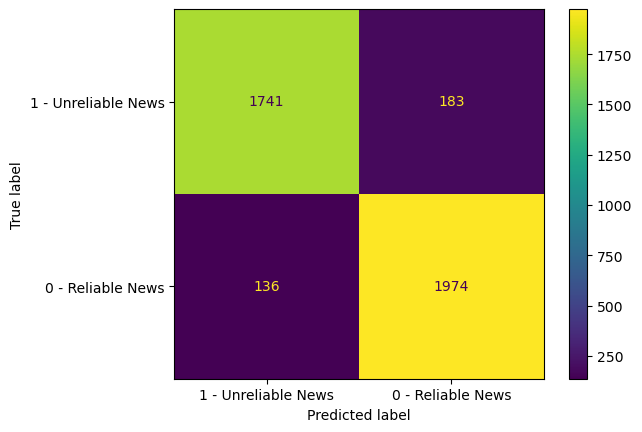

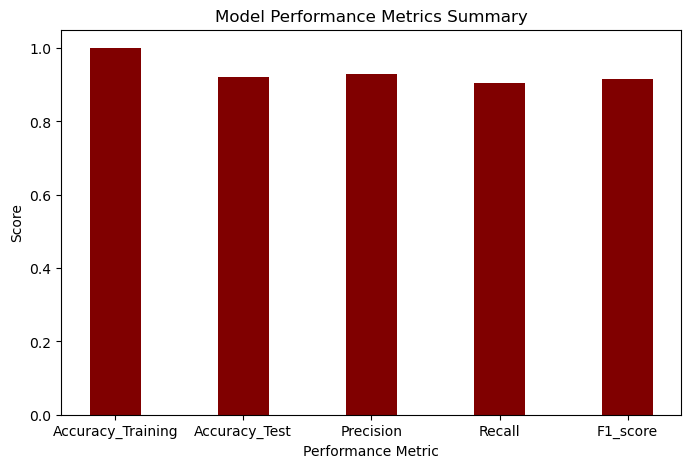

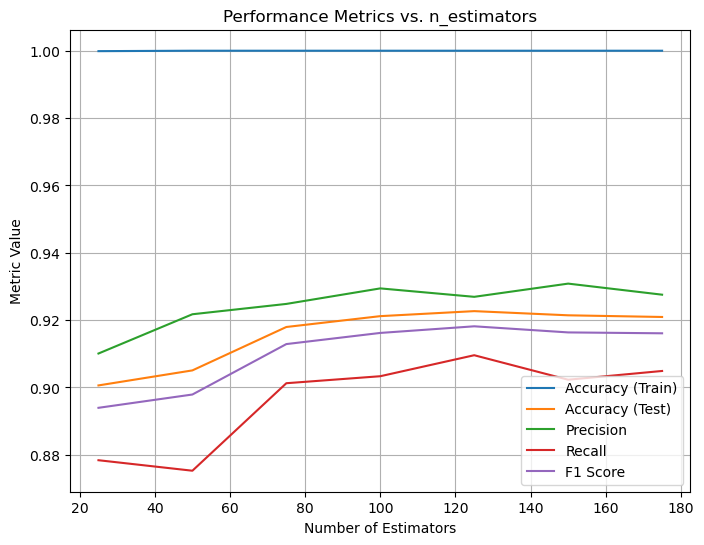

In [ ]:
n_values = np.arange(25, 200, 25)

accuracy_train_values = []
accuracy_test_values = []
precision_values = []
recall_values = []
f1_values = []

for n_estimators in n_values:
    # Create a new model with the current max_iter value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    # Fit the model on the training data
    model.fit(count_train_2gram, y_train)

    # Evaluate the model on the training and test data
    accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
        data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

    # Append the metric values to the respective lists
    accuracy_train_values.append(accuracy_train)
    accuracy_test_values.append(accuracy_test)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the metric values against max_iter values
plt.figure(figsize=(8, 6))
plt.plot(n_values, accuracy_test_values, label='Accuracy (Test)')
plt.plot(n_values, precision_values, label='Precision')
plt.plot(n_values, recall_values, label='Recall')
plt.plot(n_values, f1_values, label='F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()


Based on this, the ideal number of estimators is 125 as it maximizes the accuracy and F1 score.

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using count-lemmatized data


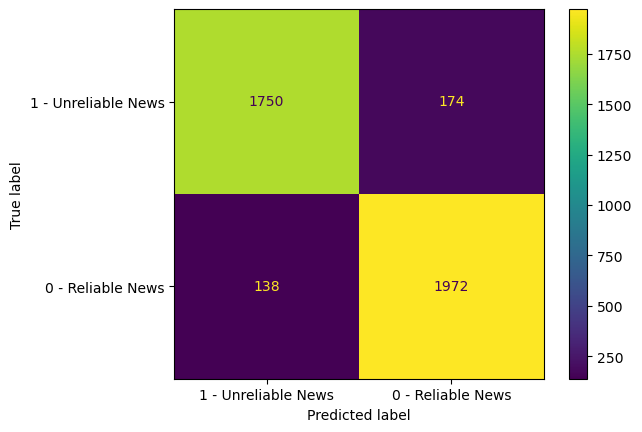

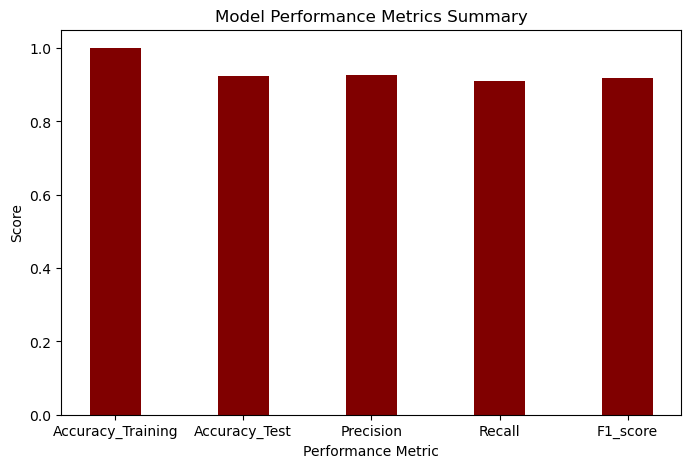

In [83]:
model_rfc = RandomForestClassifier(n_estimators=125, random_state=0)
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rfc, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rfc, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Random Forests Using TF-IDF Classifier

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using tf-idf-lemmatized data


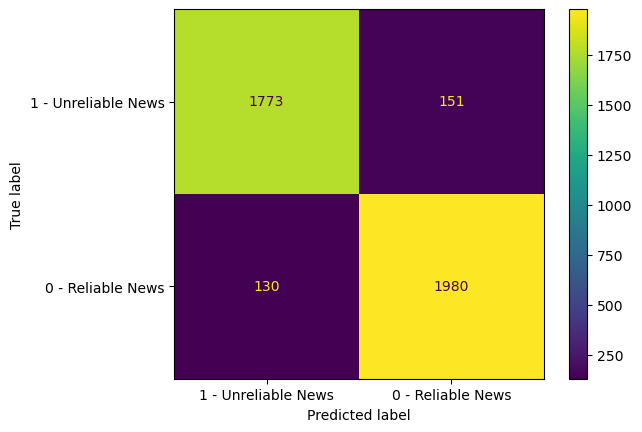

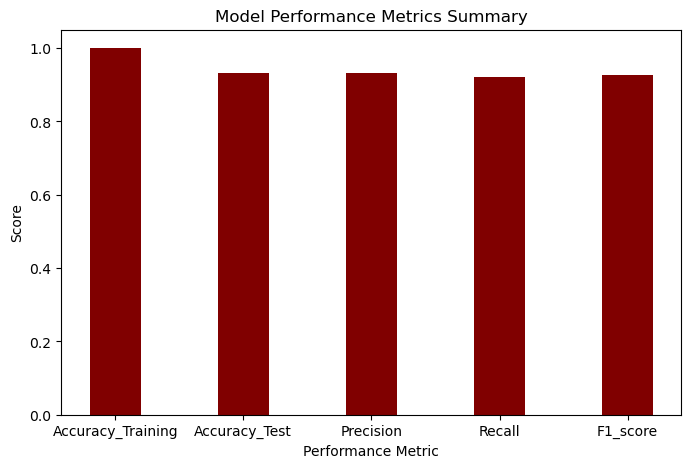

In [67]:
model_rfc = RandomForestClassifier(n_estimators=125, random_state=0)
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rfc, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rfc, accuracy_train, 
    accuracy_test, precision, recall, f1]

### Top Features for Random Forest Classifier

In [79]:

feature_names = list(tfidf_vectorizer_2gram.vocabulary_.keys())

# Retrieve feature importances
importances = model_rfc.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

# Extract the top 30 most important features
top_features = sorted_indices[:30]
top_features = np.array(top_features)

top_feature_names = [feature_names[i] for i in top_features]

for feature_name, importance in zip(top_feature_names, importances[top_features]):
    print(f"Feature: {feature_name}\t\tImportance: {importance}")


Feature: leagu winchest		Importance: 0.009578554861204888
Feature: syria hand		Importance: 0.007711597354449654
Feature: abdolrasoul		Importance: 0.006936382583147403
Feature: everywher si		Importance: 0.005849749878172425
Feature: irregular nune		Importance: 0.0034024296950169197
Feature: snowden launch		Importance: 0.0029342689040036465
Feature: mr mont		Importance: 0.0028977690487274623
Feature: jockey ayatollah		Importance: 0.002755146636810198
Feature: control crown		Importance: 0.002714681009471531
Feature: rico mani		Importance: 0.002384475563542574
Feature: plenti digit		Importance: 0.0020612367454196532
Feature: justic summarili		Importance: 0.00187787440351363
Feature: technolog fight		Importance: 0.0018622171518563363
Feature: obamacar quit		Importance: 0.001815305560399654
Feature: art manhattan		Importance: 0.0017080811746800462
Feature: plant locat		Importance: 0.0016478773042778213
Feature: acceler econoday		Importance: 0.0016046152814203304
Feature: car flash		Importanc

In [86]:
#THIS IS MEANT TO BE RUN JUST ONCE AT THE END
#After all models run, print the final summary table:
summary_df

Model Data  \
0          text-based-features   
1             count-lemmatized   
2            tf-idf-lemmatized   
3             count-lemmatized   
4             count-lemmatized   
5            tf-idf-lemmatized   
6            tf-idf-lemmatized   
7             count-lemmatized   
8            tf-idf-lemmatized   
9             count-lemmatized   
10           tf-idf-lemmatized   
11            count-lemmatized   
12           tf-idf-lemmatized   
13           tf-idf-lemmatized   
14            count-lemmatized   
15            count-lemmatized   
16  Raw Author Dummy Variables   

                                          Model Type   Accuracy_Training  \
0                                LogisticRegression()           0.688693   
1                      LogisticRegression(C=100000.0)           1.000000   
2                      LogisticRegression(C=100000.0)           1.000000   
3                             LogisticRegression(C=1)           1.000000   
4   LogisticRegression(C=1, penalty='l1', solver='...           0.999876   
5   LogisticRegression(C=1, penalty='l1', solver='...           0.944706   
6                             LogisticRegression(C=1)           0.983573   
7             PassiveAggressiveClassifier(max_iter=7)           1.000000   
8             PassiveAggressiveClassifier(max_iter=7)           1.000000   
9                                     MultinomialNB()           0.997396   
10                                    MultinomialNB()           0.943962   
11                               SVC(kernel='linear')           1.000000   
12  (DecisionTreeClassifier(max_features='sqrt', r...           1.000000   
13                               SVC(kernel='linear')           0.999504   
14                                 SVC(kernel='poly')           0.755207   
15  (DecisionTreeClassifier(max_features='sqrt', r...           1.000000   
16                               LogisticRegression()           0.998413   

    Accuracy_Test  Precision    Recall  F1_score  
0        0.693109   0.690768  0.645530  0.667383  
1        0.958850   0.956386  0.957380  0.956883  
2        0.969757   0.976720  0.959459  0.968013  
3        0.959841   0.955533  0.960499  0.958009  
4        0.962568   0.960519  0.961019  0.960769  
5        0.941745   0.946589  0.930353  0.938401  
6        0.952652   0.960659  0.939189  0.949803  
7        0.954140   0.950752  0.953222  0.951985  
8        0.970501   0.980309  0.957380  0.968709  
9        0.923649   0.980380  0.857069  0.914587  
10       0.846554   0.996198  0.680873  0.808892  
11       0.952157   0.950078  0.949584  0.949831  
12       0.930342   0.931687  0.921518  0.926574  
13       0.969013   0.975674  0.958940  0.967235  
14       0.686415   0.607574  0.967256  0.746340  
15       0.922657   0.926907  0.909563  0.918153  
16       0.934946   0.996313  0.871072  0.929493

Data Representation: Both count-lemmatized and tf-idf-lemmatized data representations yield comparable performance. TF-IDF seems to provide a slight advantage in capturing the importance of individual words in the text.

Based on the provided summary table, it appears that the logistic regression models with only text-based features perform poorly with a low accuracy score and lower values on other metrics as compared to the other models. The models using the vectorizers with different regularization strengths (C values) perform well in predicting fake news. These models achieve high accuracy scores on both the training and test data, indicating good generalization capabilities. The precision, recall, and F1 scores are also high, suggesting a good balance between identifying fake news correctly and minimizing false positives.

The passive aggressive classifier model, also shows promising results. These models achieve high accuracy on the training data and decent accuracy on the test data. The precision, recall, and F1 scores are generally high, indicating reliable performance in detecting fake news.

Passive aggressive classifier with tf-idf performs the best on precision with L1 regularized logistic regression performing the best on recall. Looking at the F1 scores in the summary table, we see values ranging from approximately 0.94 to 0.97. These scores indicate a good balance between precision and recall, implying that the models perform well in identifying fake news while minimizing both false positives and false negatives.

#### Additional Features

In this section, we create some additional features that will be used in the next stage of our project to improve our models. 

**Sentiment Analysis**

Sentiment analysis can be a useful tool for fake news detection, as fake news articles often contain language that is emotionally charged or misleading in order to manipulate readers' emotions. We will consider two measures of sentiment analysis: polarity and subjectivity as we think that would be most relevant for fake news detection task. 

In [87]:
def sentiment_scores(text):
    sentiment = TextBlob(text)
    return sentiment.polarity, sentiment.subjectivity


training_data['sentiment'] = training_data['clean_text'].astype(str).apply(sentiment_scores)


In [90]:
sentiments = training_data[['label', 'sentiment']]
sentiments['polarity_val'] = sentiments['sentiment'].str[0]
sentiments['subjectivity_val'] = sentiments['sentiment'].str[1]

/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1844310795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['polarity_val'] = sentiments['sentiment'].str[0]
/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1844310795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['subjectivity_val'] = sentiments['sentiment'].str[1]


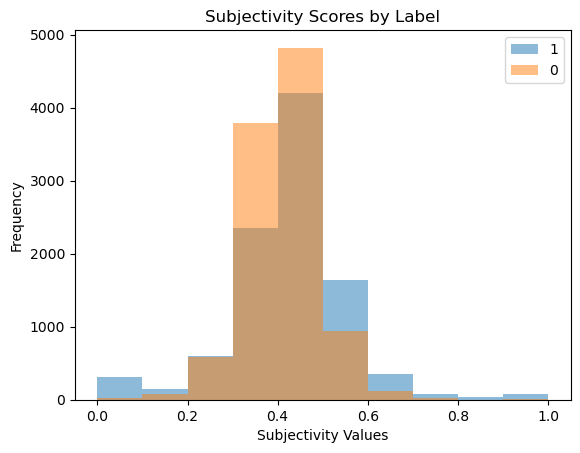

In [93]:
# Create a dictionary to store sentiment values for each label
sentiment_by_label = {}

# Group sentiment values by label
for sentiment, label in zip(sentiments['subjectivity_val'], sentiments['label']):
    if label not in sentiment_by_label:
        sentiment_by_label[label] = []
    sentiment_by_label[label].append(sentiment)

# Plot histograms for each label
for label, values in sentiment_by_label.items():
    plt.hist(values, bins=10, alpha=0.5, label=label)

# Set labels and title
plt.xlabel('Subjectivity Values')
plt.ylabel('Frequency')
plt.title('Subjectivity Scores by Label')

# Add a legend
plt.legend()

# Display the plot
plt.show()

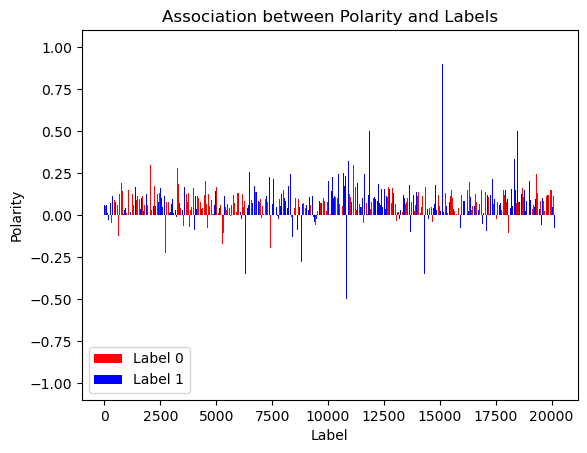

In [95]:

group_data = sentiments.groupby('label')['polarity_val']
color_map = {0: 'red', 1: 'blue'}

for label, color in color_map.items():
    label_data = sentiments[sentiments['label'] == label]
    plt.bar(label_data.index, label_data['polarity_val'], color=color, label=f'Label {label}')

plt.title('Association between Polarity and Labels')
plt.xlabel('Label')
plt.ylabel('Polarity')
plt.legend()
plt.show()


Based on an initial analysis, polarity scores don’t seem to correlate with news being reliable or unreliable. On the other hand, subjectivity scores are more spread out for unreliable news, indicating that unreliable news is more subjective than reliable news. 

**Parts of Speech Tagging**

Parts of speech (POS) can be a good feature for fake news detection because they provide information about the grammatical structure of a sentence, which can be indicative of the author's intent and writing style. For example, fake news articles may use different parts of speech than legitimate news articles in order to make their content more sensational or misleading.

In [97]:
training_data['pos_tag'] = training_data['clean_text'].astype(str).apply(lambda x: nltk.pos_tag(word_tokenize(x)))
training_data['pos_tag'].head()

0    [(by, IN), (darrell, NN), (lucus, NN), (on, IN...
1    [(ever, RB), (get, VB), (the, DT), (feeling, N...
2    [(october, RB), (twenty-nine, JJ), (two, CD), ...
3    [(videos, IN), (the, DT), (rate, NN), (at, IN)...
4    [(print, NN), (an, DT), (iranian, JJ), (woman,...
Name: pos_tag, dtype: object

**Named Entity Recognition (NER)**

Named entity recognition (NER) can be a good feature for fake news detection because it can identify entities mentioned in the news article and provide context on what they refer to. This information can be used to detect patterns or anomalies in the way entities are mentioned, which can be indicative of fake news.

In [98]:
def named_entity_recognition(tagged_tokens):
    chunked = nltk.ne_chunk(tagged_tokens)
    return chunked

training_data['named_entities'] = training_data['pos_tag'].apply(named_entity_recognition)
training_data['named_entities'].head()

0    [(by, IN), (darrell, NN), (lucus, NN), (on, IN...
1    [(ever, RB), (get, VB), (the, DT), (feeling, N...
2    [(october, RB), (twenty-nine, JJ), (two, CD), ...
3    [(videos, IN), (the, DT), (rate, NN), (at, IN)...
4    [(print, NN), (an, DT), (iranian, JJ), (woman,...
Name: named_entities, dtype: object

#### Next Steps

The next steps would be to finetune the model using additional features such as sentiment analysis, parts of speech, named entity recognition and simple topic modeling to see whether the inclusion of additional features improves model performance.